# Survival Prediction on Titanic Dataset

Problem Statement: According to the given data, we need to predict the survival of the passengers.

Dataset Source : https://www.kaggle.com/c/titanic/data

#### Workflow: 
- Import required libraries
- Exploratory Data Analysis(EDA)
- Feature Scaling 
- Feature Engineering
- Model creation and Evaluation

## 1.Import Required libraries

In [9]:
#!pip install missingno 
#for visualizing missing data in dataframe

In [24]:
pip install missingno

In [25]:
import missingno as msno


In [10]:
#for data processing
import re
import pandas as pd
import numpy as np
#for data visualization
import seaborn as sns
import matplotlib.pyplot as plt
#algorithms

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

## 2.Exploratory Data Analysis (EDA)

Before building any Machine Learning model, it is important to perform some Data Analysis to get general idea. EDA is the process to examine and understand the data and extracting data insights as well as main characteristics. To understand the problem statement and vasrious relationship between the data features EDA is very essential. 

###### EDA is generally classified into two methods:
- graphical analysis 
- non-graphical analysis.

##### Steps of EDA

- Understand the data
- Basic Exploration and Data cleaning
- Univariate Analysis
- Bivariate Analysis
- Multivariate Analysis
- Encoding Categorical variables
- Normalizing and Scaling

In [11]:
test_df = pd.read_csv("test.csv")  #load the datasets
train_df = pd.read_csv("train.csv")

In [12]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [13]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


### ___(a)Understand the data

To solve any problem it is necessary to understand the data. The most important task is to determine the Dependent Variable and Independent Variables. 

In [14]:
print(train_df.columns.tolist())
print(test_df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


###### Column data details:

- Survived - Survival (0 = No; 1 = Yes)
- Pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
- Name - Name
- Sex - Sex
- Age - Age
- SibSp - Number of Siblings/Spouses Aboard
- Parch - Number of Parents/Children Aboard
- Ticket - Ticket Number
- Fare - Passenger Fare
- Cabin - Cabin
- Embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

As the task is to do predictive analysis on survival, 
#### The Dependent Variable(the Target/ Label), y = Survived

The survival of the passengers depends on different parameters: Sex, Age, SibSp, Parch, Pclass, Fare, Cabin, Embarked
#### The Independent Variables, X = Sex, Age, SibSp, Parch, Pclass, Fare, Embarked 

& the unnecesary columns will be dropped as they do not have any impact on the result. 

### ____ (b)Basic Exploration and Data Cleaning

### Basic Exploration

In [15]:
train_df.dtypes  #checking the datatypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [16]:
test_df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [17]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [18]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### Checking missing values in the dataframe

**Difference between nan values and null Values, do they mean same result?**   

**null values** represents **"no value" or "nothing"**, it's **not even an empty string or zero**. It can be used to represent that nothing useful exists.

**NaN** stands for **"Not a Number"**, it's usually the **result of a mathematical operation** that doesn't make sense, i.e: 0.0/0.0.

###### ---- Visualizing methods to observe missing values in the dataframe

**Matrix-Plot** : If you're working with depth-related or time-series data, the matrix plot is an excellent tool. Each column has a different color fill. When data is provided, the plot is coloured in grey (or your preferred color), but when data is not present, the plot is white.

**Bar Plot** : The barplot is a simple plot in which each bar represents one of the dataframe's columns. The height of the bar represents the column's completeness, or the number of non-null values present.

**Heatmap:**  
- used to identify correlations of the nullity between each of the different columns. In other words, it can be used to identify if there is a relationship in the presence of null values between each of the columns.
- Values close to positive 1 indicate that the presence of null values in one column is correlated with the presence of null values in another column.
- Values close to negative 1 indicate that the presence of null values in one column is anti-correlated with the presence of null values in another column. In other words, when null values are present in one column, there are data values present in the other column, and vice versa.
- Values close to 0, indicate there is little to no relationship between the presence of null values in one column compared to another.
- There are a number of values that show as <-1. This indicates that the correlation is very close to being 100% negative.

**Dendogram :** 
The dendrogram plot shows a tree-like graph generated by hierarchical clustering, that groups together columns with high nullity correlations.
When a collection of columns is grouped at level zero, the presence or absence of nulls in one of the columns is directly related to the presence or absence of nulls in the other columns. The less the tree's columns are divided, the better.

In [19]:
null_values = train_df.isna().sum().sort_values(ascending=True)
null_values                                                      
                                                            

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

<Axes: >

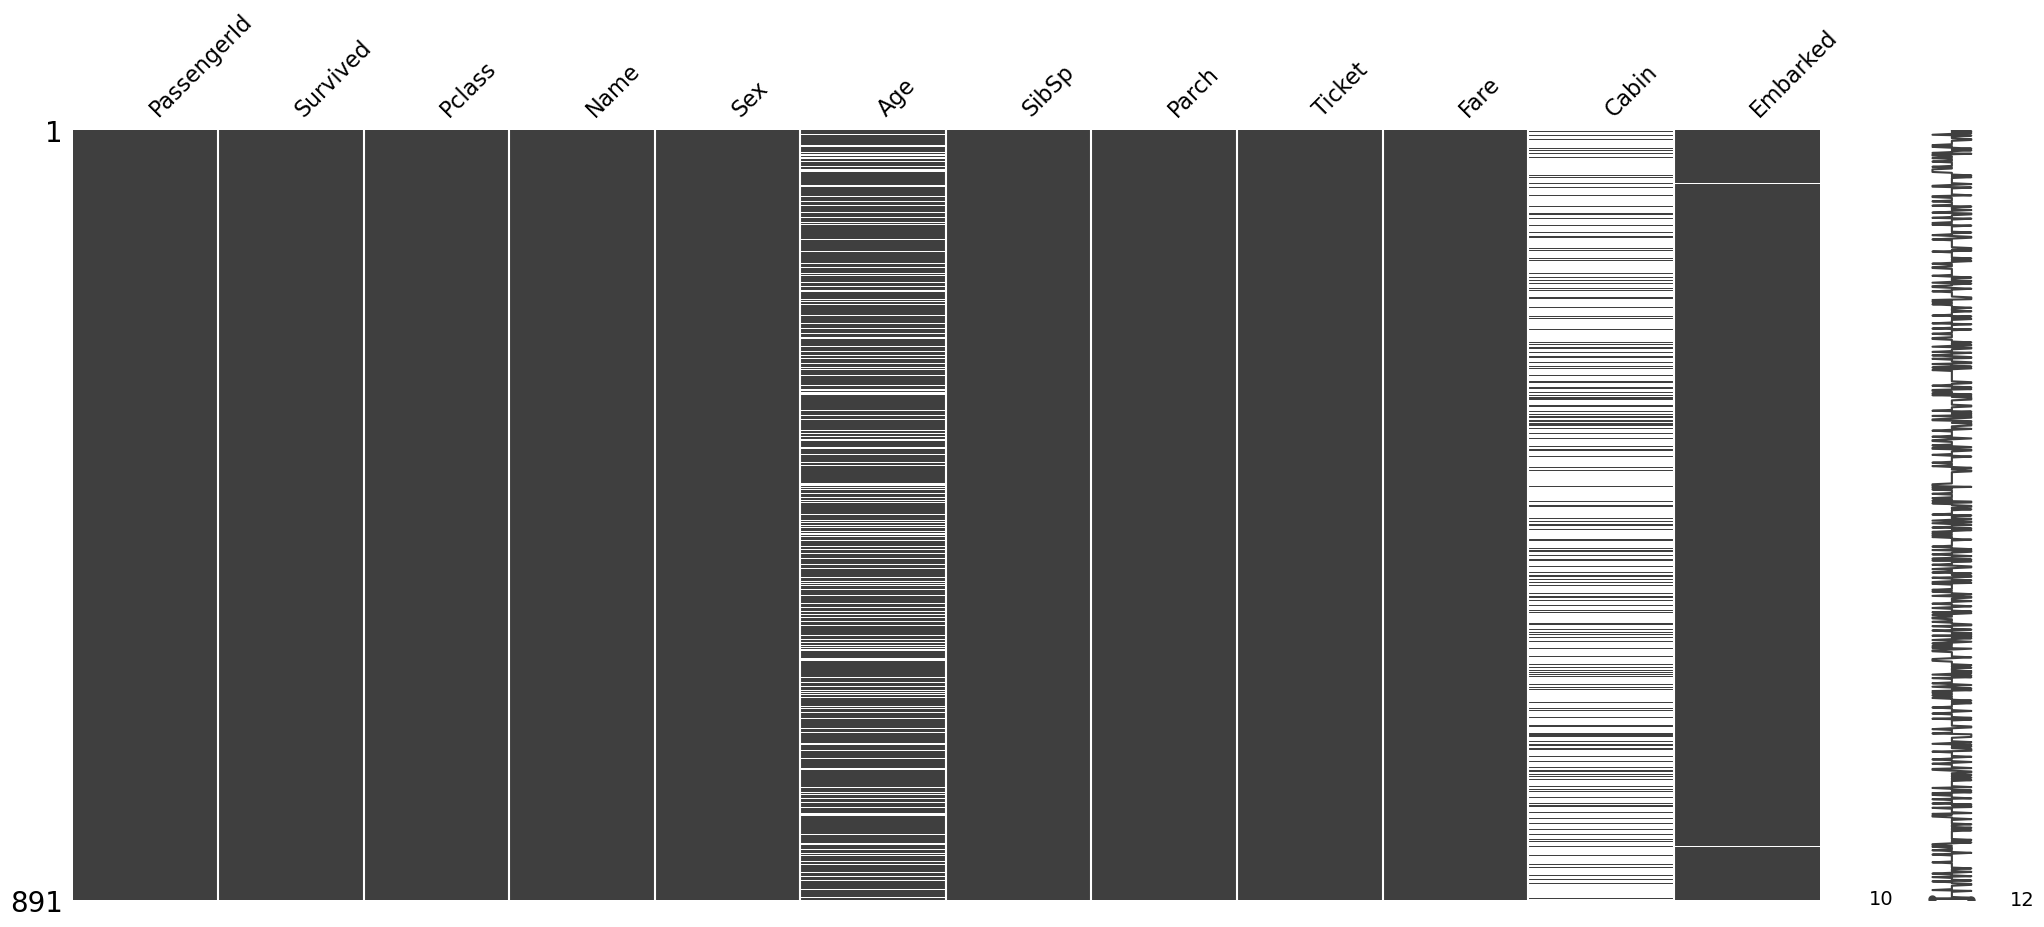

In [26]:
msno.matrix(train_df)  #matrix plot

<Axes: >

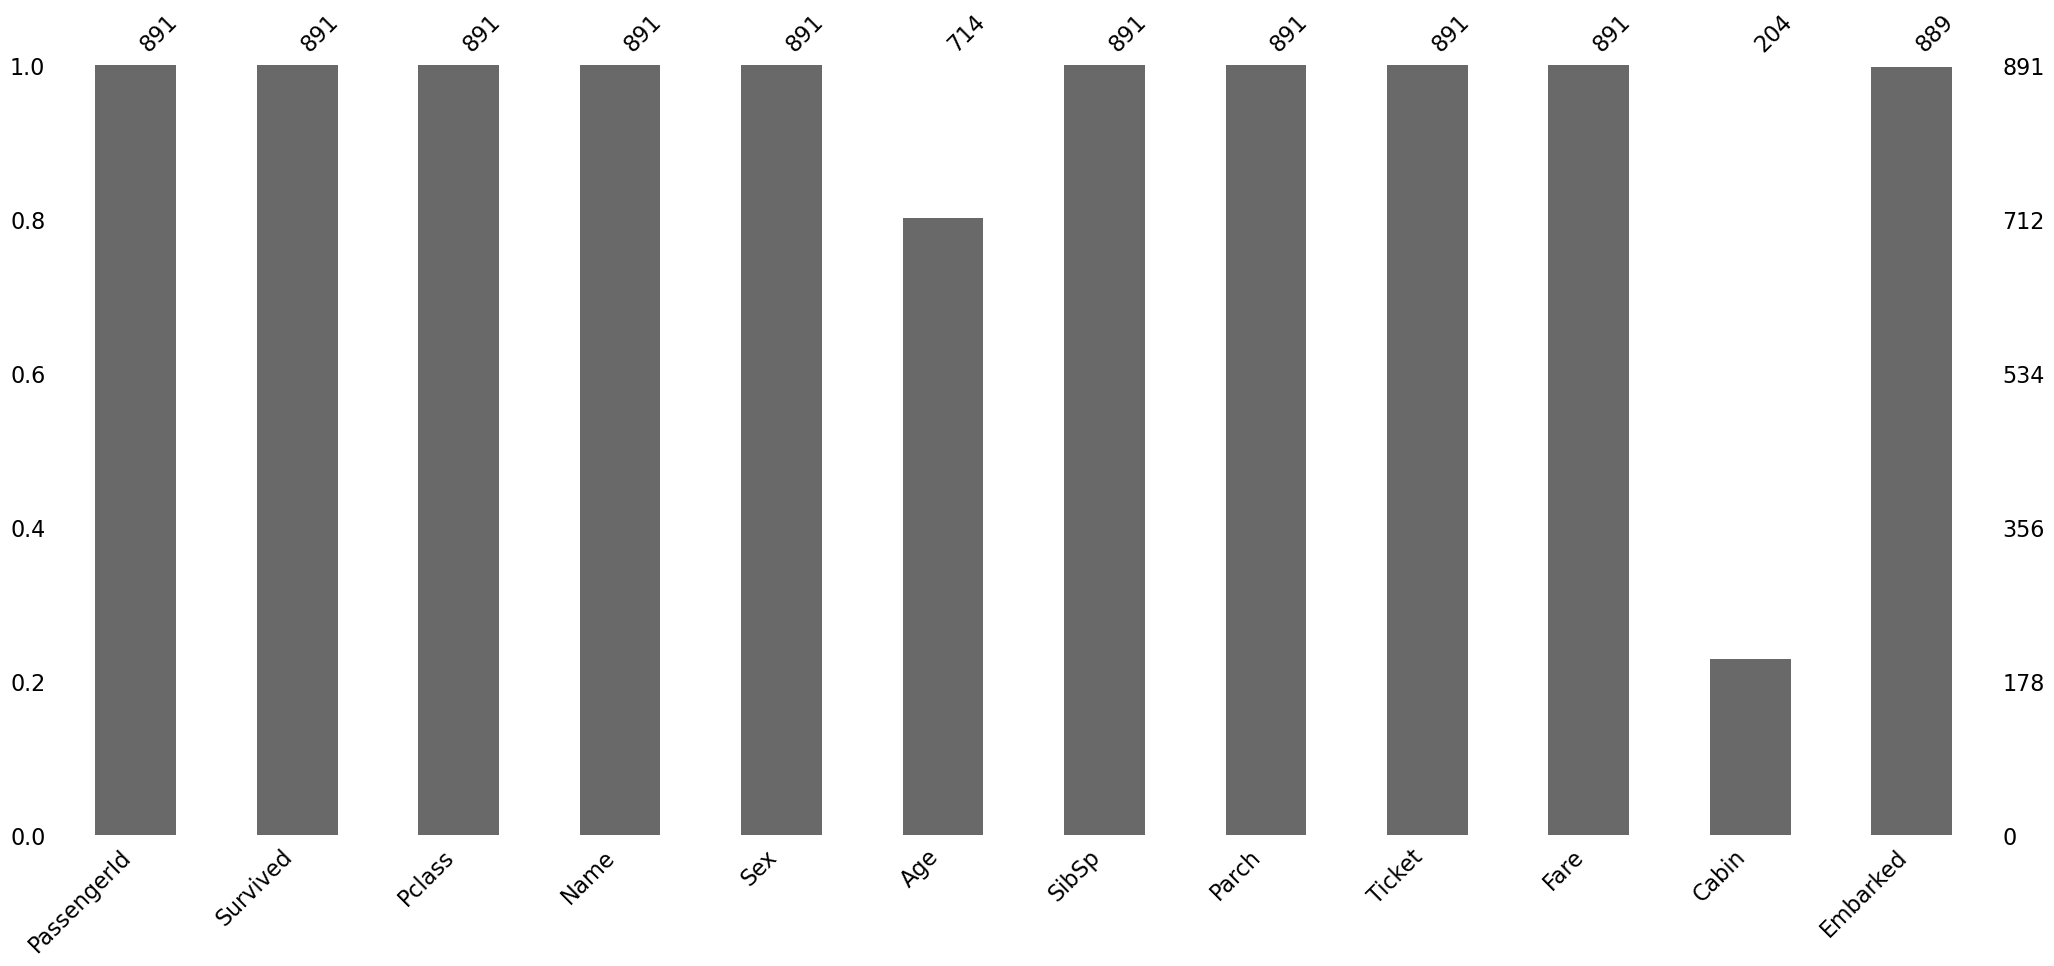

In [27]:
msno.bar(train_df) #bar plot

In [28]:
nan_values = train_df.isna().sum().sort_values(ascending=True)
nan_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
Age            177
Cabin          687
dtype: int64

<Axes: >

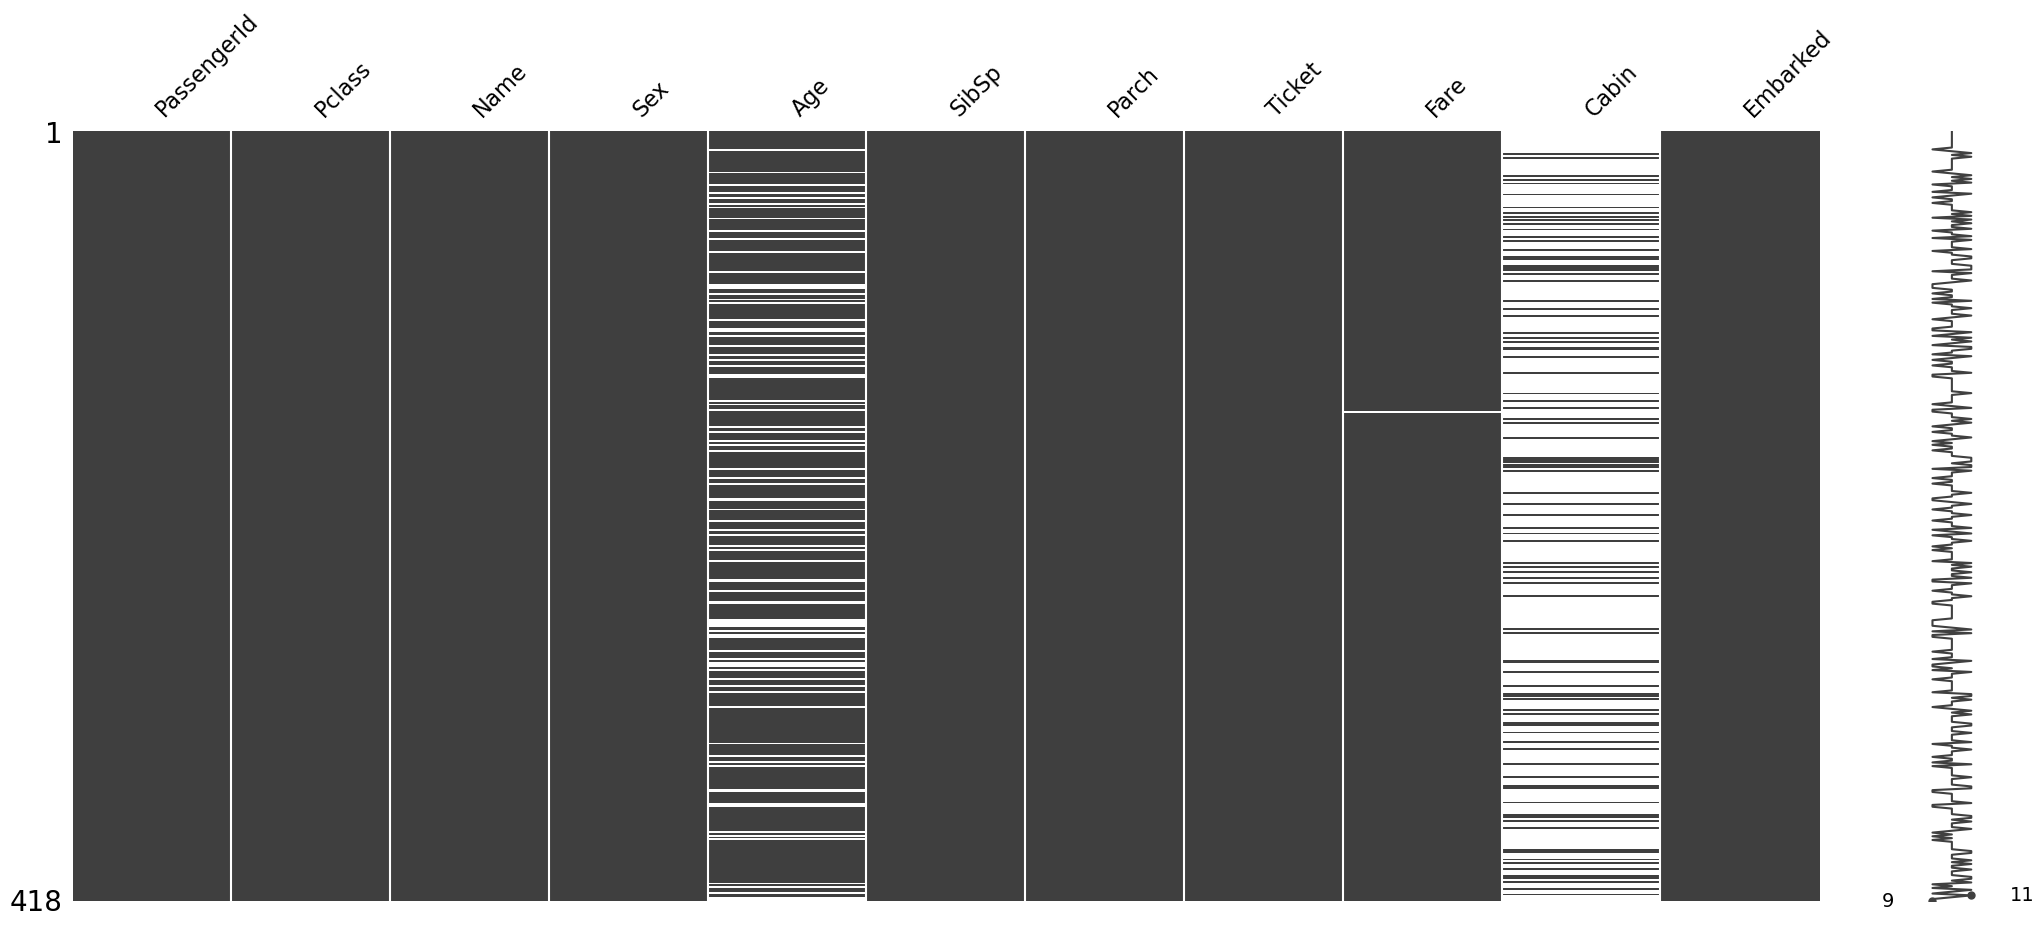

In [29]:
msno.matrix(test_df)   #matrix plot

<Axes: >

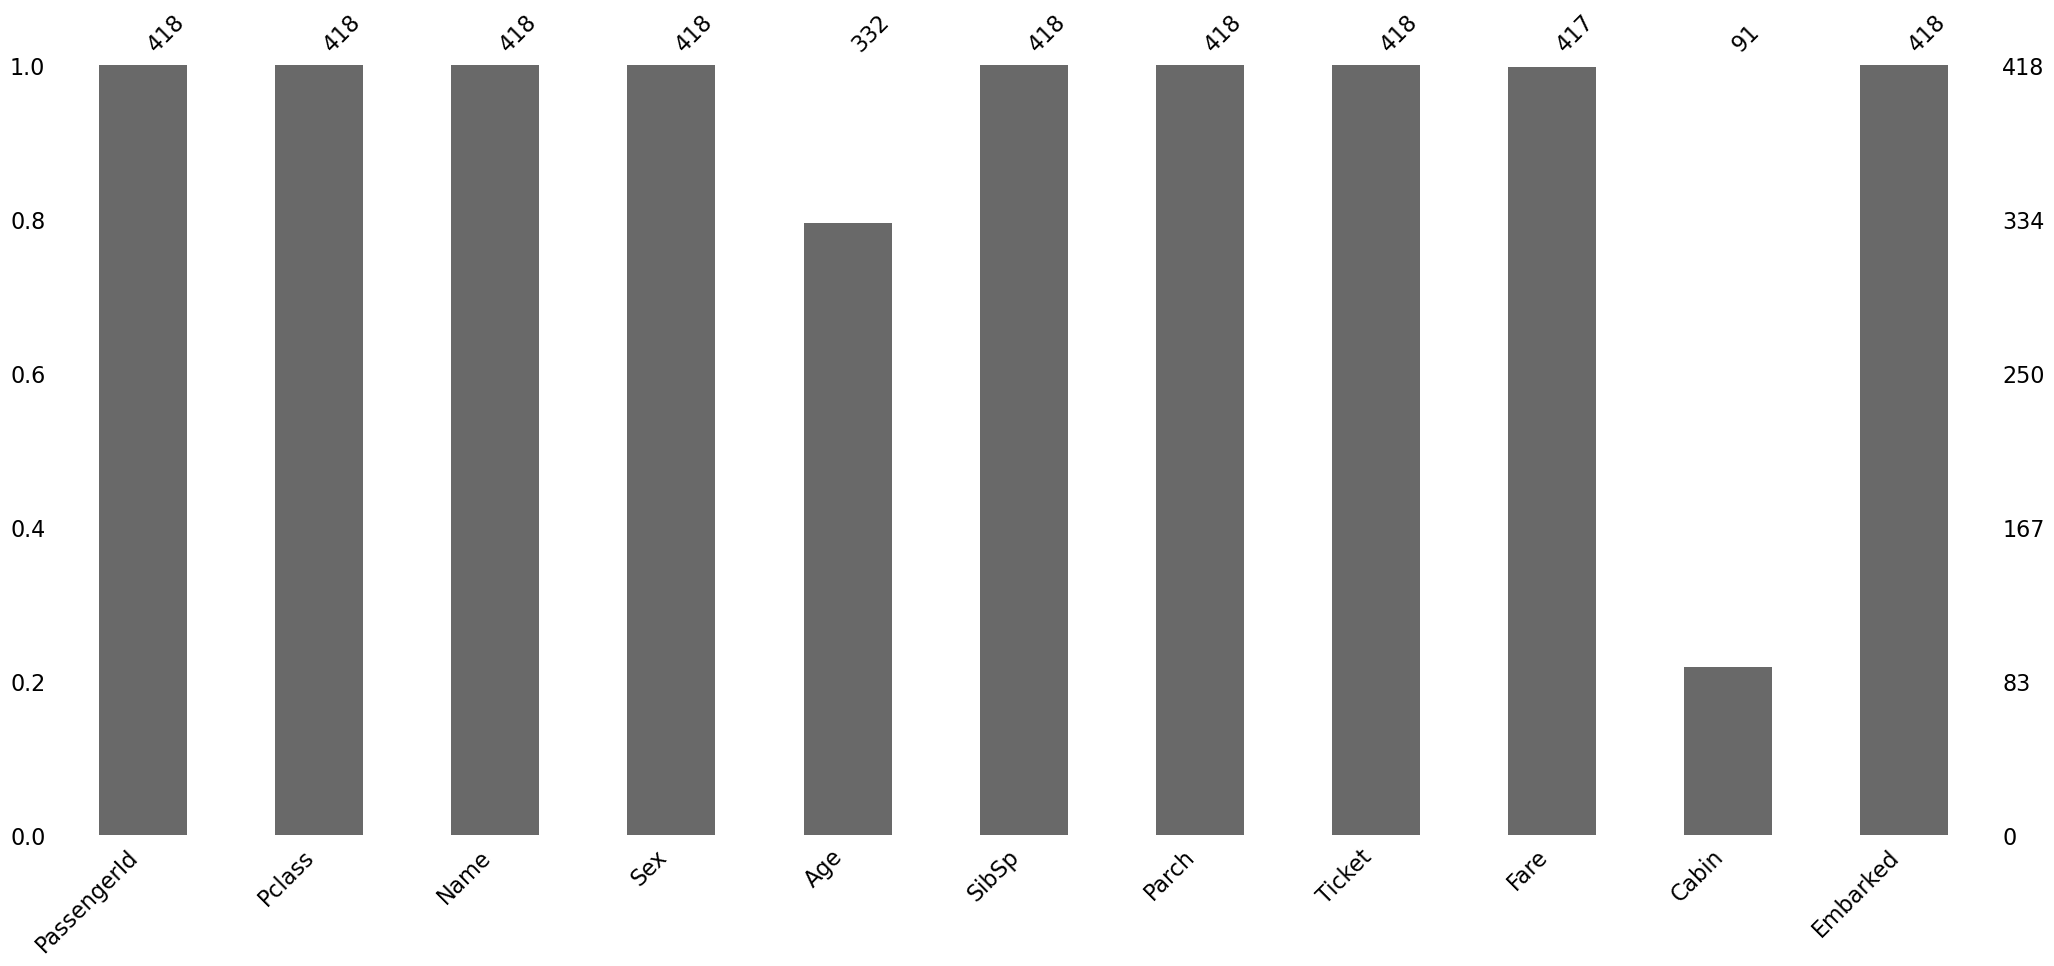

In [30]:
msno.bar(test_df)  #bar plot

<Axes: >

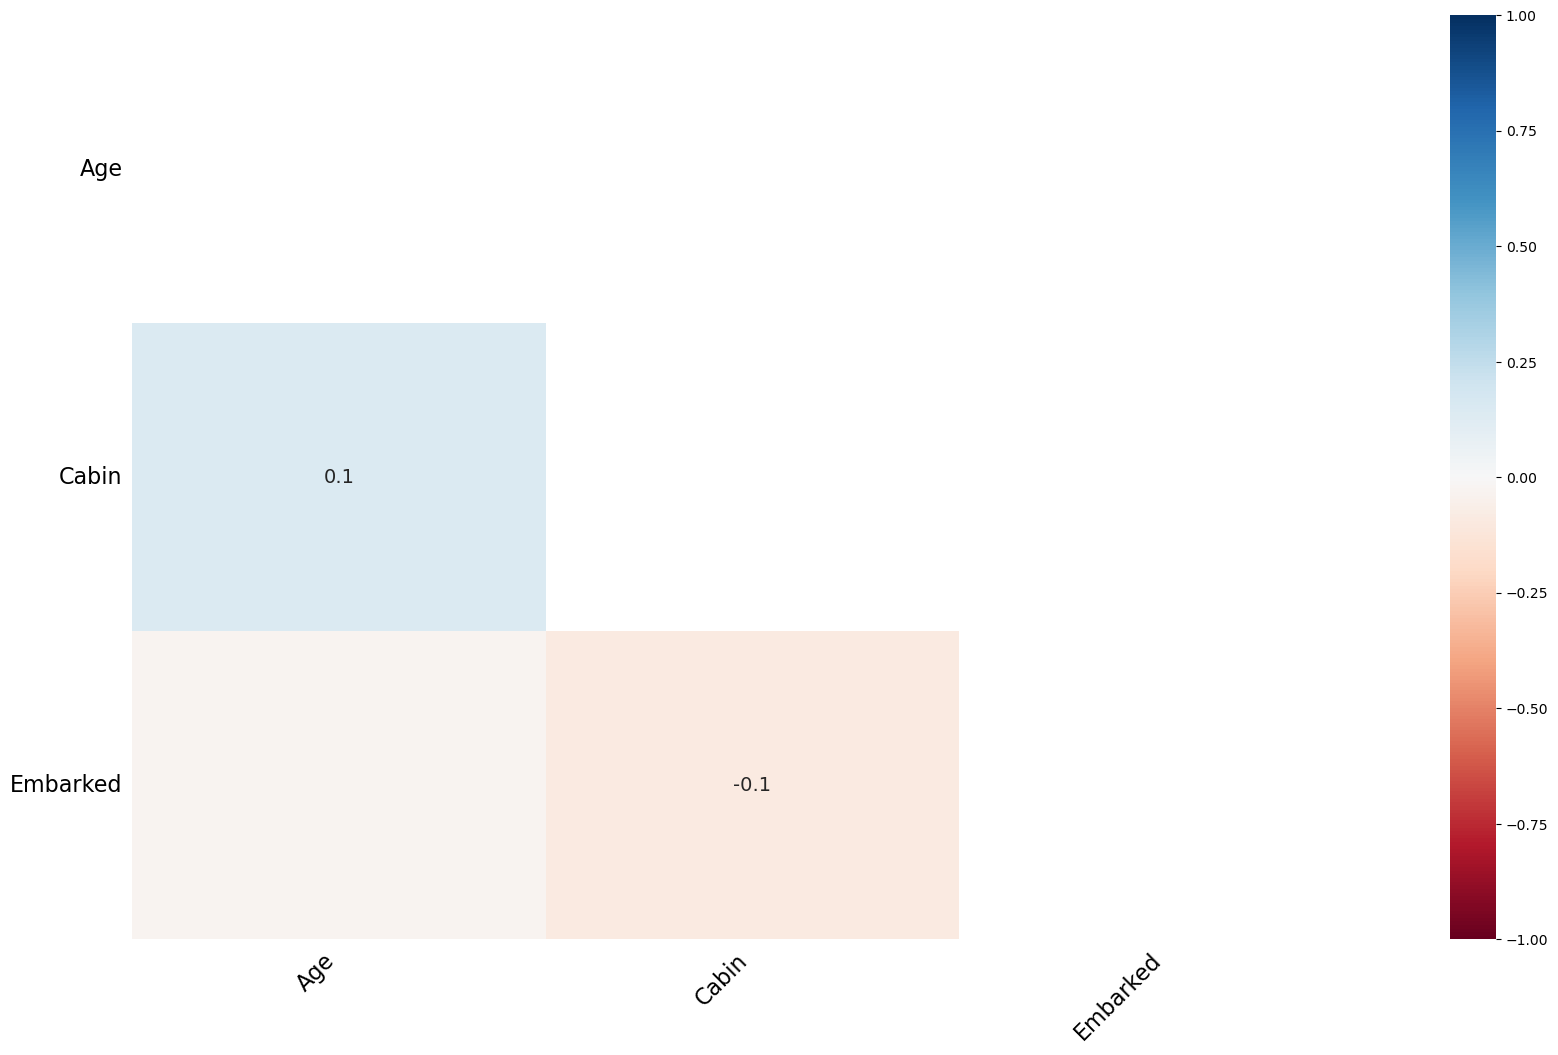

In [31]:
msno.heatmap(train_df) #heatmap

<Axes: >

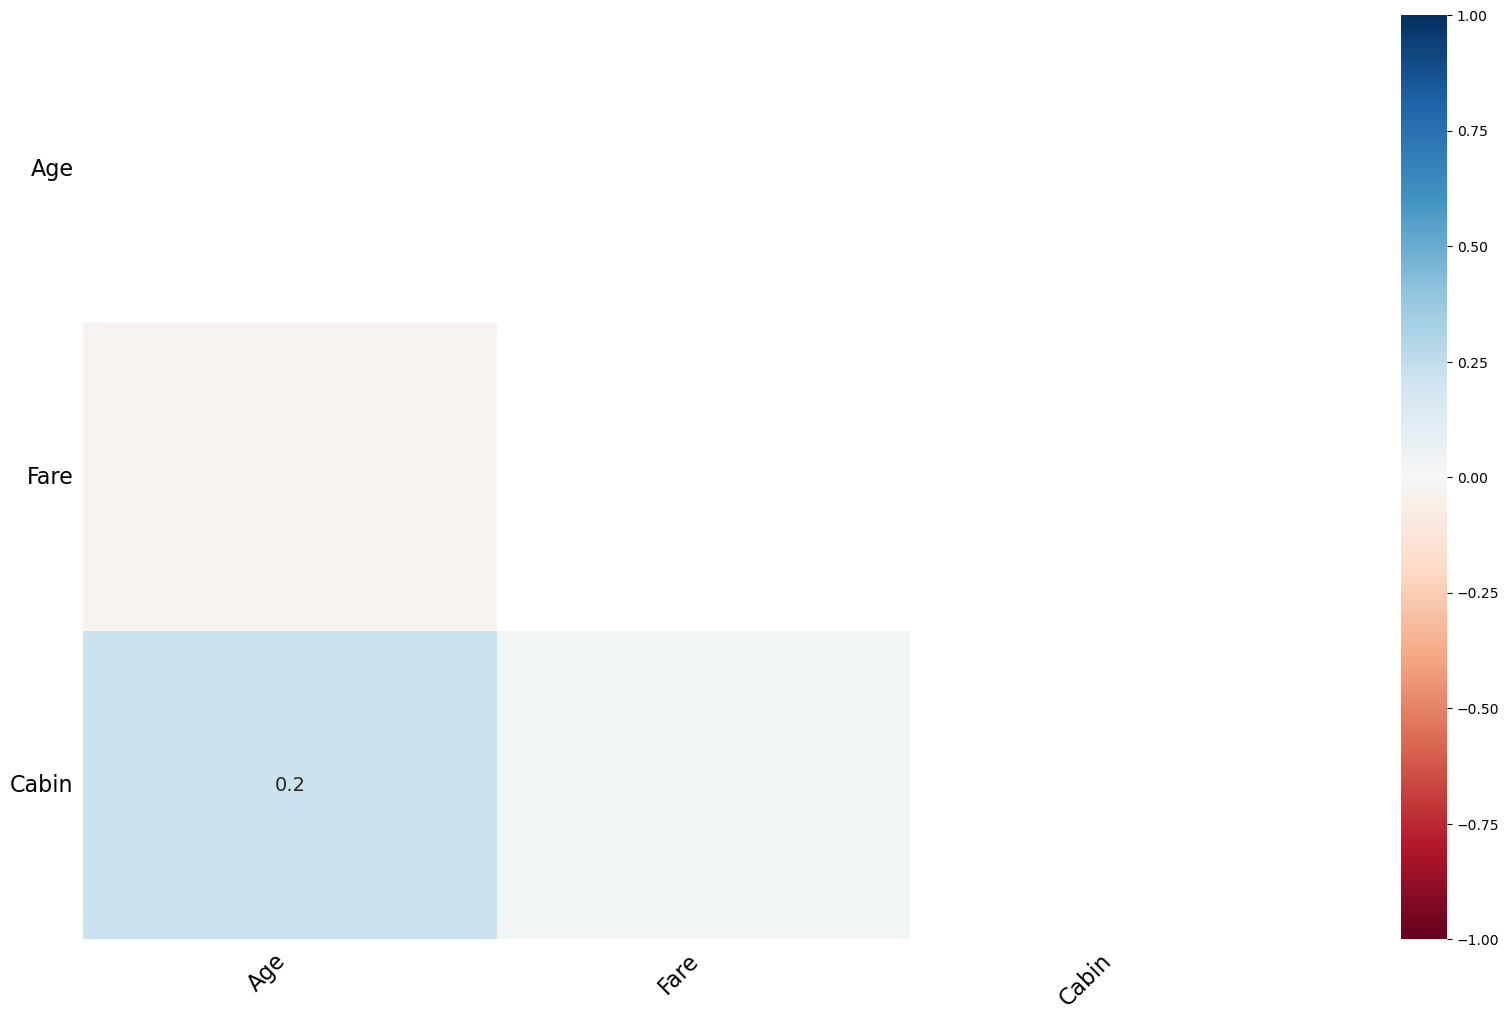

In [32]:
msno.heatmap(test_df) #heatmap

<Axes: >

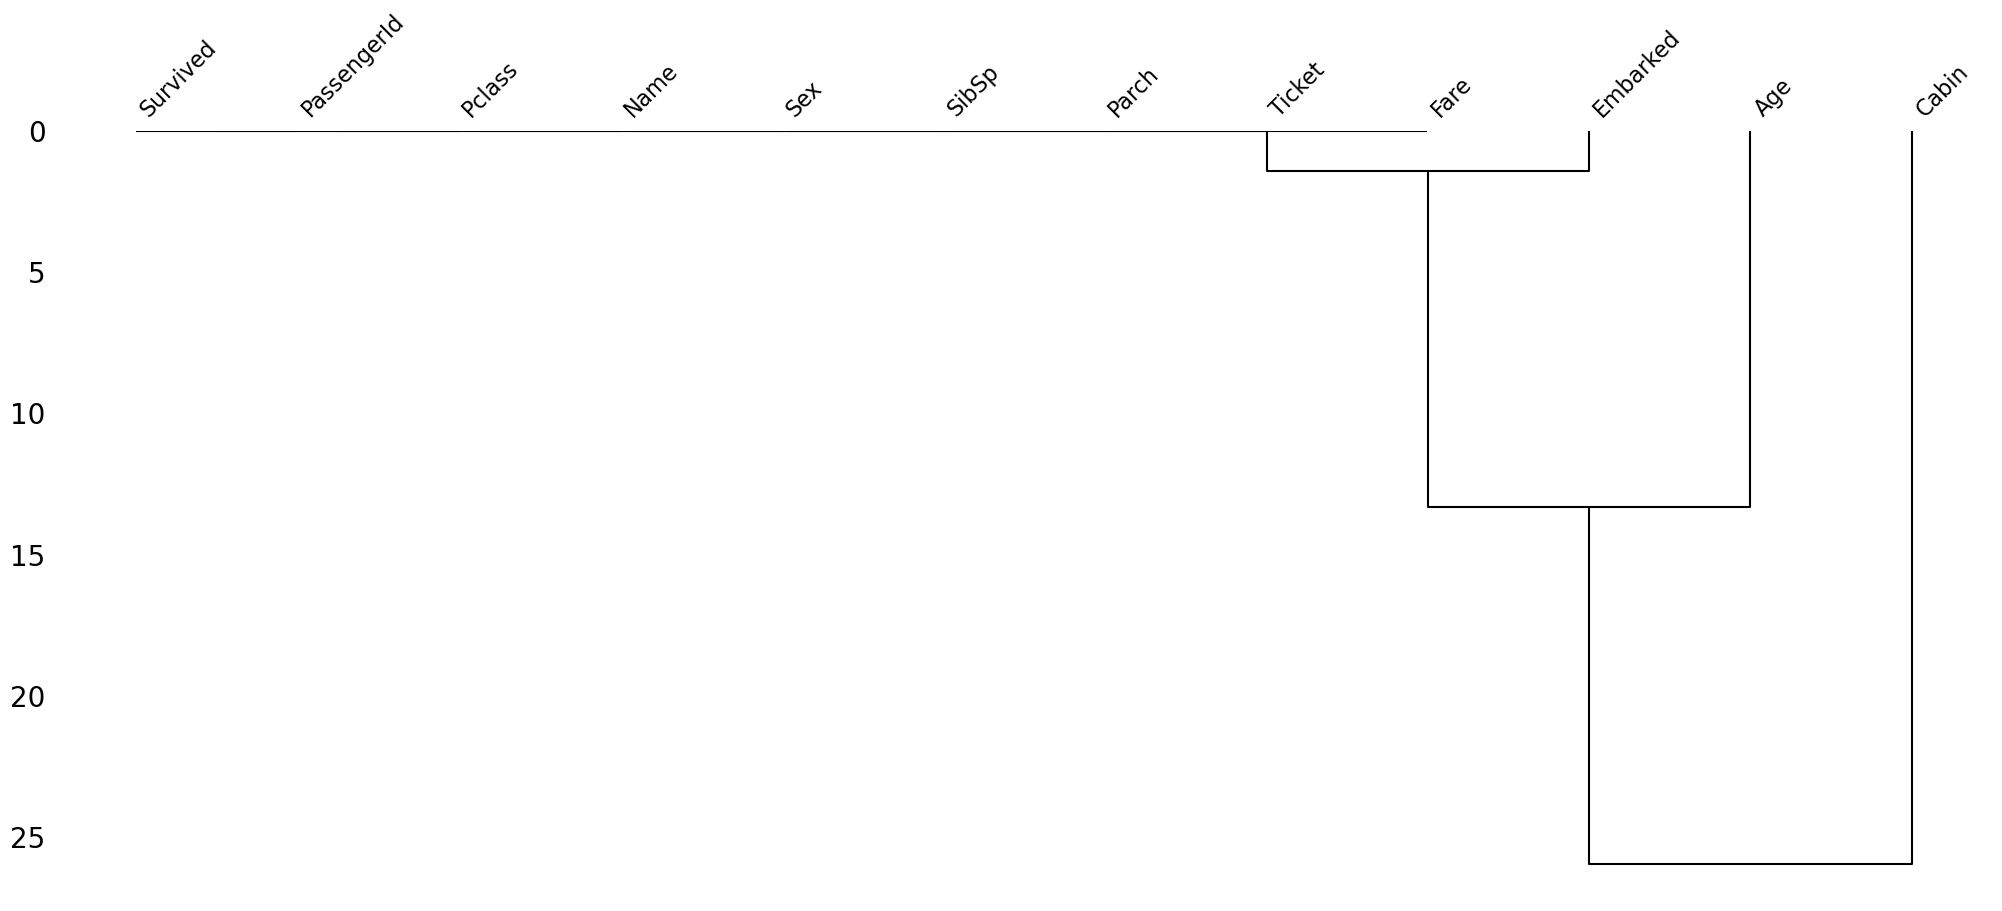

In [33]:
msno.dendrogram(train_df) #dendogram

<Axes: >

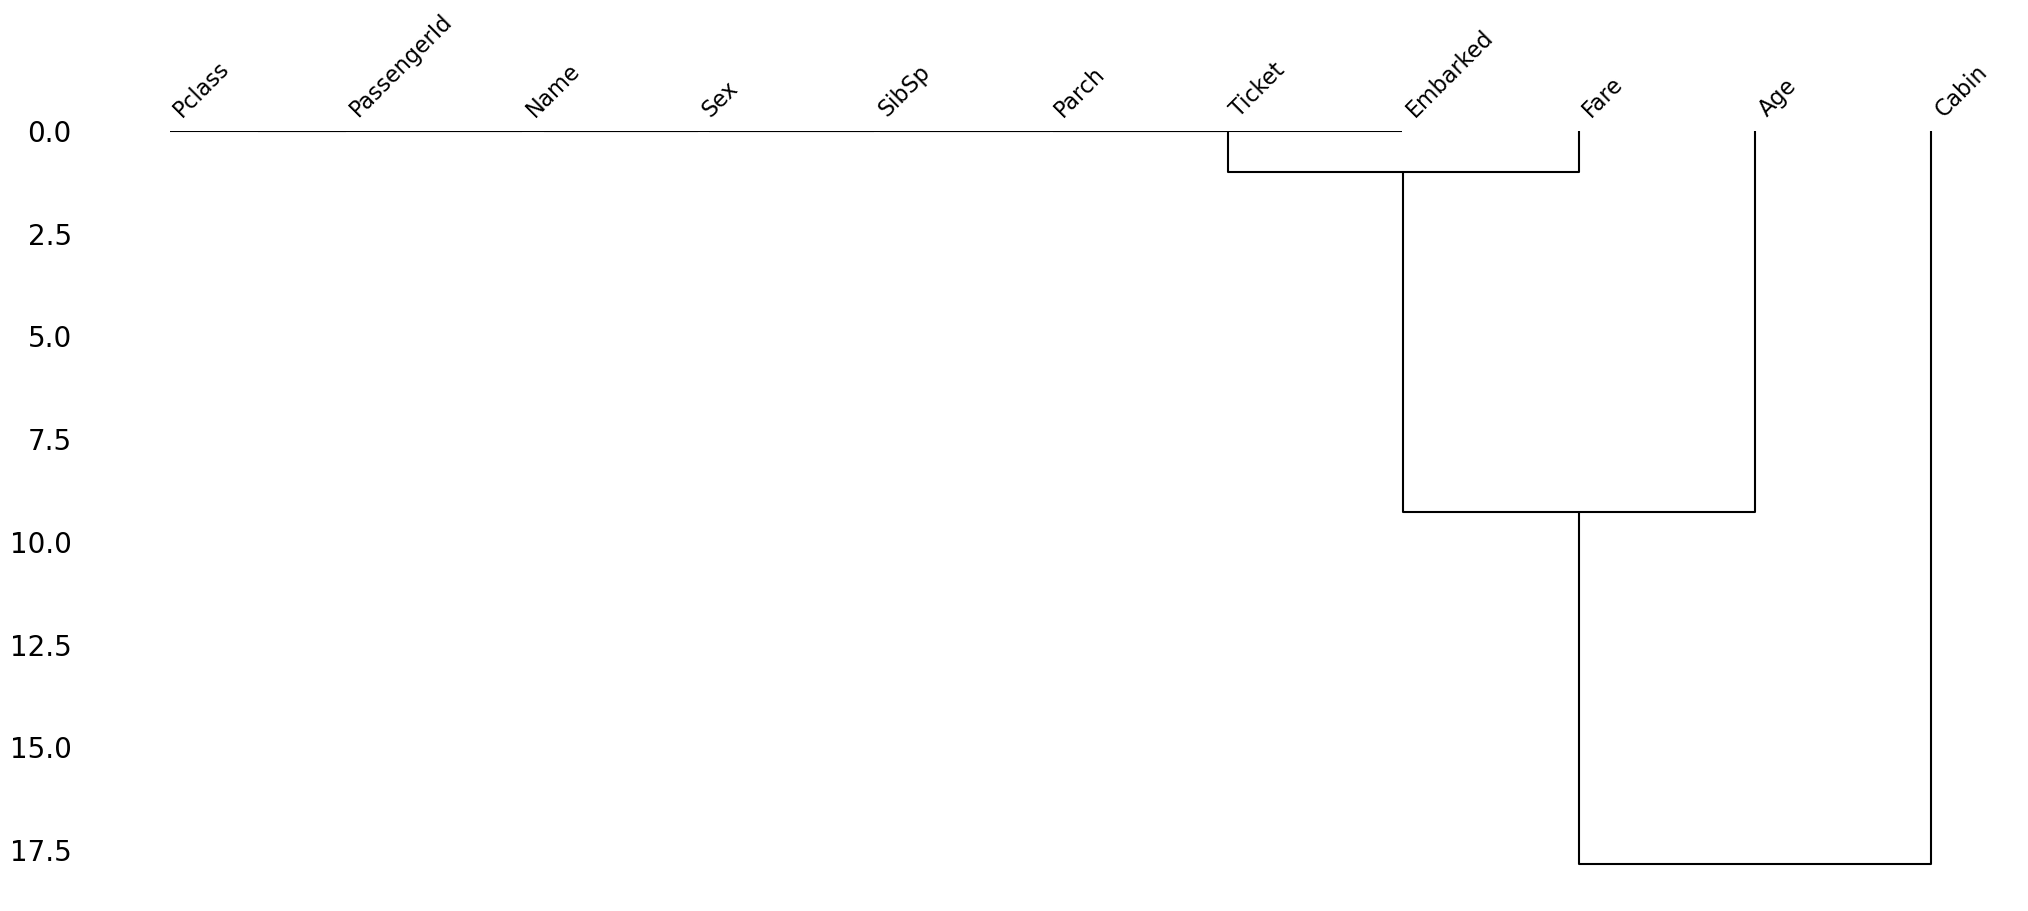

In [34]:
msno.dendrogram(test_df) #dendogram

In [35]:
SurvivedOrDied = train_df['Survived'].value_counts()
SurvivedOrDied

0    549
1    342
Name: Survived, dtype: int64

##### Pie chart for visualizing the percentage of death and survival

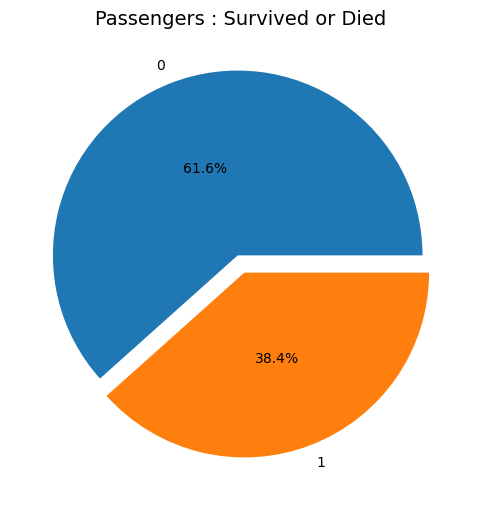

In [36]:
pie, ax = plt.subplots(figsize=[10,6])
labels = SurvivedOrDied.keys()
plt.pie(x=SurvivedOrDied, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5)
plt.title("Passengers : Survived or Died", fontsize=14);

##### Distribution plot for visualizing the survival ratio between Male and Female 

C:\Users\rajug\AppData\Local\Temp\ipykernel_22068\128209329.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'Survived', ax = axes[0], kde =False)
C:\Users\rajug\AppData\Local\Temp\ipykernel_22068\128209329.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad

Text(0.5, 1.0, 'Male')

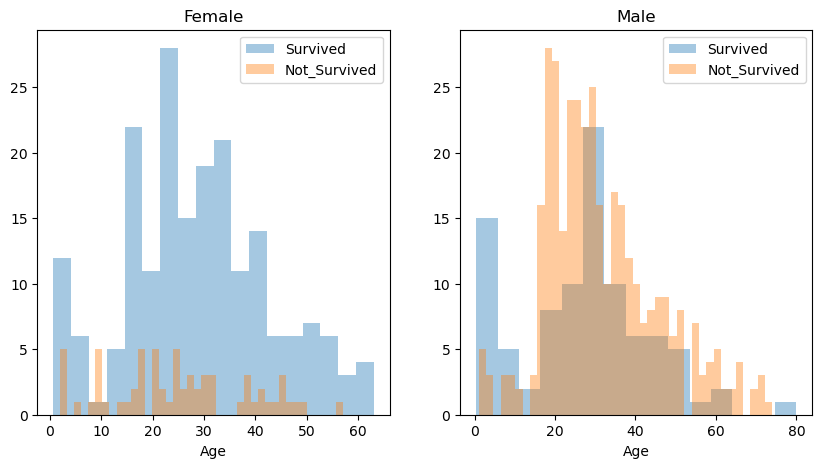

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(10, 5))
women = train_df[train_df['Sex']=='female']
men = train_df[train_df['Sex']=='male']
sns.set_palette("pastel")
ax1 = sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, label = 'Survived', ax = axes[0], kde =False)
ax2 = sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = 'Not_Survived', ax = axes[0], kde =False)
ax1.legend()
ax1.set_title('Female')

ax2 = sns.distplot(men[men['Survived']==1].Age.dropna(), bins=15, label = 'Survived', ax = axes[1], kde = False)
ax2 = sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, label = 'Not_Survived', ax = axes[1], kde = False)

ax2.legend()

ax2.set_title('Male')

Here data has been plot based on the age factor, whether the passengers survived or not survived, and it created a distribution plot for women and men.

- From this distribution, men have a high probability of death, when they are between the age 18 and 40 years old. For woman's survival, chances are higher between 14 to 40 years.
- women have a higher chance of survival than the men, the ages between 14 years to 30 years.
- for men, the chances of survival is higher than they are between 18 to 40 for 40, and the probability of survival is very low between five and 18.
- the infants have a higher probability of survival. 

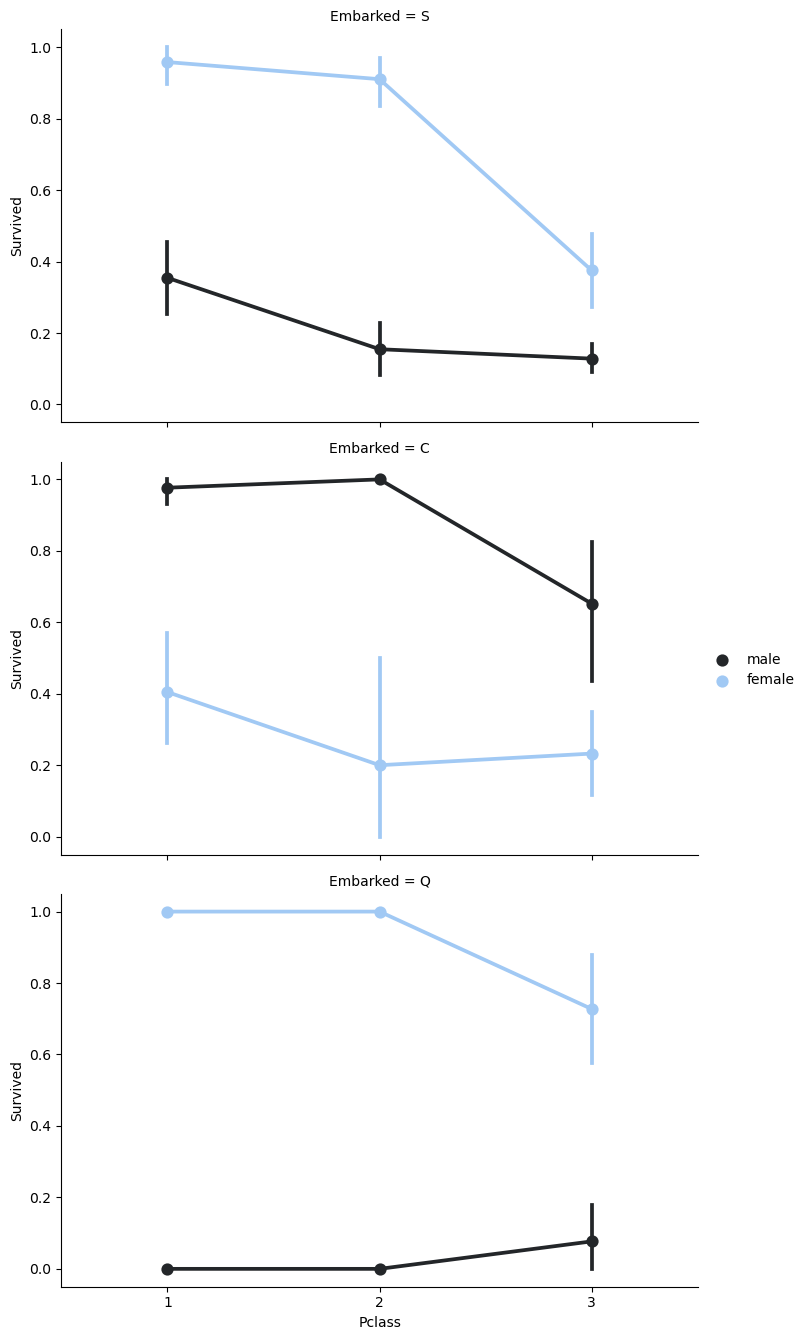

In [38]:
#facetgrid visualization


FacetGrid = sns.FacetGrid(train_df, row='Embarked', height=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

**FacetGrid class** helps in visualizing distribution of one variable as well as the relationship between multiple variables separately within subsets of your dataset using multiple panels. A FacetGrid can be drawn with up to three dimensions

here showing the survival rate of male and female based on the embarked class. - Woman on port Q and S has the highest survival rate, and the male has the lowest survival rate. 
- in the port C, the male has the highest survival rate than the female passengers.           

#### Check Duplicate data

In [39]:
train_df.duplicated().sum()

0

In [40]:
test_df.duplicated().sum()

0

#### Issues found from the Dataset:

- Need to drop unnecessary columns that are not responsible for the Survival of the passengers
- Missing values are available, need to Drop or Impute the Missing Values
- Duplicate data are unavailable, no issues with handling them
- Categorical data is present, need to perform Label Encoding

### Data Cleaning

- Removing unnecessary columns
- Missing values treatment
- Outlier treatment

##### Dropping unnecessary columns

In [41]:
train_df = train_df.drop(['Ticket','Name'], axis=1)
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0,13.0000,NaN,S
887,888,1,1,female,19.0,0,0,30.0000,B42,S
888,889,0,3,female,NaN,1,2,23.4500,NaN,S
889,890,1,1,male,26.0,0,0,30.0000,C148,C


In [42]:
test_df = test_df.drop(['Ticket','Name'], axis=1)
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34.5,0,0,7.8292,NaN,Q
1,893,3,female,47.0,1,0,7.0000,NaN,S
2,894,2,male,62.0,0,0,9.6875,NaN,Q
3,895,3,male,27.0,0,0,8.6625,NaN,S
4,896,3,female,22.0,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,NaN,0,0,8.0500,NaN,S
414,1306,1,female,39.0,0,0,108.9000,C105,C
415,1307,3,male,38.5,0,0,7.2500,NaN,S
416,1308,3,male,NaN,0,0,8.0500,NaN,S


In [43]:
print(train_df.columns.tolist())
print(test_df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']
['PassengerId', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin', 'Embarked']


### Missing Values Treatment 

The cause of missing values can be through data extraction and collection. The handling of missing data is very important during the preprocessing of the dataset because most of the machine learning algorithms do not support missing values. The methods to treat missing values: 
- Data Deletion
- Mean/ Mode/ Median Imputation for both categorical and continuous data
- Filling data with numeric values
- Filling with common/top value among the categorical data for that specific column

note: A model trained with the removal of all missing values creates a robust model. There is loss of a lot of informations, Shows poor performance if the percentage of missing values is excessive in comparison to the complete dataset. On the other hand, data imputation mostly works well on small datasets as it's easy to implement and prevents data loss. Therefore, It's not a good practice to directly delete/drop the missing values without trying other methods. It is recomended to check the performance applying both methods.

##### NAN Value to numeric value : columns of Continuous data

##### Data Imputation for Continous/ Numerical Data : Mean Imputation Method


In [44]:
#train dataset

In [45]:
train_df['Age'] = train_df['Age'].fillna((train_df['Age'].mean()))
train_df['Age']= train_df['Age'].astype(int)
print (train_df['Age'].unique())
print()
print(train_df['Age'].dtypes)
train_df

[22 38 26 35 29 54  2 27 14  4 58 20 39 55 31 34 15 28  8 19 40 66 42 21
 18  3  7 49 65  5 11 45 17 32 16 25  0 30 33 23 24 46 59 71 37 47 70 12
  9 36 51 44  1 61 56 50 62 41 52 63 43 60 10 64 13 48 53 57 80  6 74]

int32


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22,1,0,7.2500,NaN,S
1,2,1,1,female,38,1,0,71.2833,C85,C
2,3,1,3,female,26,0,0,7.9250,NaN,S
3,4,1,1,female,35,1,0,53.1000,C123,S
4,5,0,3,male,35,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,13.0000,NaN,S
887,888,1,1,female,19,0,0,30.0000,B42,S
888,889,0,3,female,29,1,2,23.4500,NaN,S
889,890,1,1,male,26,0,0,30.0000,C148,C


In [46]:
# test dataset

In [47]:
test_df['Age'] = test_df['Age'].fillna((test_df['Age'].mean()))
test_df['Age']= test_df['Age'].astype(int)
print (test_df['Age'].unique())
print()
print(test_df['Age'].dtypes)
test_df

[34 47 62 27 22 14 30 26 18 21 46 23 63 24 35 45 55  9 48 50 41 33 25 39
 60 36 20 28 10 17 32 13 31 29  6 67 49  2 76 43 16  1 12 42 53 40 61  7
 15 54 64 37 11  8  0 38 57 19 58 59 44  5 51  3]

int32


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34,0,0,7.8292,NaN,Q
1,893,3,female,47,1,0,7.0000,NaN,S
2,894,2,male,62,0,0,9.6875,NaN,Q
3,895,3,male,27,0,0,8.6625,NaN,S
4,896,3,female,22,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30,0,0,8.0500,NaN,S
414,1306,1,female,39,0,0,108.9000,C105,C
415,1307,3,male,38,0,0,7.2500,NaN,S
416,1308,3,male,30,0,0,8.0500,NaN,S


##### NAN Value to numeric value : columns of Categorical data
- fill the nan values with the common value for that column
- apply **Label Encoding Method** for data conversion in numeric form

In [48]:
  # missing value imputing value for the column 'Embarked'

In [49]:
train_df['Embarked'].describe()  

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [50]:
top_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(top_value)
    
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22,1,0,7.2500,NaN,S
1,2,1,1,female,38,1,0,71.2833,C85,C
2,3,1,3,female,26,0,0,7.9250,NaN,S
3,4,1,1,female,35,1,0,53.1000,C123,S
4,5,0,3,male,35,0,0,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,13.0000,NaN,S
887,888,1,1,female,19,0,0,30.0000,B42,S
888,889,0,3,female,29,1,2,23.4500,NaN,S
889,890,1,1,male,26,0,0,30.0000,C148,C


In [51]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,892,3,male,34,0,0,7.8292,NaN,Q
1,893,3,female,47,1,0,7.0000,NaN,S
2,894,2,male,62,0,0,9.6875,NaN,Q
3,895,3,male,27,0,0,8.6625,NaN,S
4,896,3,female,22,1,1,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30,0,0,8.0500,NaN,S
414,1306,1,female,39,0,0,108.9000,C105,C
415,1307,3,male,38,0,0,7.2500,NaN,S
416,1308,3,male,30,0,0,8.0500,NaN,S


In [52]:
train_df['Embarked'].isnull().sum().any()

False

In [53]:
test_df['Embarked'].isnull().sum().any()

False

In [54]:
# missing value imputing value for the column 'Cabin'

In [55]:
print(train_df['Cabin'].unique())

[nan 'C85' 'C123' 'E46' 'G6' 'C103' 'D56' 'A6' 'C23 C25 C27' 'B78' 'D33'
 'B30' 'C52' 'B28' 'C83' 'F33' 'F G73' 'E31' 'A5' 'D10 D12' 'D26' 'C110'
 'B58 B60' 'E101' 'F E69' 'D47' 'B86' 'F2' 'C2' 'E33' 'B19' 'A7' 'C49'
 'F4' 'A32' 'B4' 'B80' 'A31' 'D36' 'D15' 'C93' 'C78' 'D35' 'C87' 'B77'
 'E67' 'B94' 'C125' 'C99' 'C118' 'D7' 'A19' 'B49' 'D' 'C22 C26' 'C106'
 'C65' 'E36' 'C54' 'B57 B59 B63 B66' 'C7' 'E34' 'C32' 'B18' 'C124' 'C91'
 'E40' 'T' 'C128' 'D37' 'B35' 'E50' 'C82' 'B96 B98' 'E10' 'E44' 'A34'
 'C104' 'C111' 'C92' 'E38' 'D21' 'E12' 'E63' 'A14' 'B37' 'C30' 'D20' 'B79'
 'E25' 'D46' 'B73' 'C95' 'B38' 'B39' 'B22' 'C86' 'C70' 'A16' 'C101' 'C68'
 'A10' 'E68' 'B41' 'A20' 'D19' 'D50' 'D9' 'A23' 'B50' 'A26' 'D48' 'E58'
 'C126' 'B71' 'B51 B53 B55' 'D49' 'B5' 'B20' 'F G63' 'C62 C64' 'E24' 'C90'
 'C45' 'E8' 'B101' 'D45' 'C46' 'D30' 'E121' 'D11' 'E77' 'F38' 'B3' 'D6'
 'B82 B84' 'D17' 'A36' 'B102' 'B69' 'E49' 'C47' 'D28' 'E17' 'A24' 'C50'
 'B42' 'C148']


In [56]:
import re
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for df in data:
    df['Cabin'] = df['Cabin'].fillna("U0")
    df['Deck'] = df['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    df['Deck'] = df['Deck'].map(deck)
    df['Deck'] = df['Deck'].fillna(0)
    df['Deck'] = df['Deck'].astype(int)

In [57]:
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

In [58]:
train_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,1,0,3,male,22,1,0,7.2500,S,8
1,2,1,1,female,38,1,0,71.2833,C,3
2,3,1,3,female,26,0,0,7.9250,S,8
3,4,1,1,female,35,1,0,53.1000,S,3
4,5,0,3,male,35,0,0,8.0500,S,8
...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27,0,0,13.0000,S,8
887,888,1,1,female,19,0,0,30.0000,S,2
888,889,0,3,female,29,1,2,23.4500,S,8
889,890,1,1,male,26,0,0,30.0000,C,3


In [59]:
test_df

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck
0,892,3,male,34,0,0,7.8292,Q,8
1,893,3,female,47,1,0,7.0000,S,8
2,894,2,male,62,0,0,9.6875,Q,8
3,895,3,male,27,0,0,8.6625,S,8
4,896,3,female,22,1,1,12.2875,S,8
...,...,...,...,...,...,...,...,...,...
413,1305,3,male,30,0,0,8.0500,S,8
414,1306,1,female,39,0,0,108.9000,C,3
415,1307,3,male,38,0,0,7.2500,S,8
416,1308,3,male,30,0,0,8.0500,S,8


# Checking Multicolinearity & Creating more new features, normalizing data with common features

**Multicolinearity** : Whwn an indwpwndwnt variable can be predicted frpm another independent variable that is called multicolinearity. 

**How to overcome?**
- Remove that column
- Add columns together to create new column

- small family
- lonely child
- family

In [60]:
train_df['Small Family'] = np.where((train_df['SibSp'] <= 2) & (train_df['SibSp'] != 0), 1, 0)
test_df['Small Family'] = np.where((test_df['SibSp'] <= 2) & (test_df['SibSp'] != 0), 1, 0)
train_df['Lonely Child'] = np.where(train_df['Parch'] == 1, 1, 0)
test_df['Lonely Child'] = np.where(test_df['Parch'] == 1, 1, 0)

train_df['Family'] = train_df['SibSp'] + train_df['Parch']
test_df['Family'] = test_df['SibSp'] + test_df['Parch']

In [61]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Small Family,Lonely Child,Family
0,1,0,3,male,22,1,0,7.2500,S,8,1,0,1
1,2,1,1,female,38,1,0,71.2833,C,3,1,0,1
2,3,1,3,female,26,0,0,7.9250,S,8,0,0,0
3,4,1,1,female,35,1,0,53.1000,S,3,1,0,1
4,5,0,3,male,35,0,0,8.0500,S,8,0,0,0


In [62]:
test_df.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,Small Family,Lonely Child,Family
0,892,3,male,34,0,0,7.8292,Q,8,0,0,0
1,893,3,female,47,1,0,7.0000,S,8,1,0,1
2,894,2,male,62,0,0,9.6875,Q,8,0,0,0
3,895,3,male,27,0,0,8.6625,S,8,0,0,0
4,896,3,female,22,1,1,12.2875,S,8,1,1,2


In [63]:
train_df = train_df.drop(['SibSp','Parch'], axis=1)
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Small Family,Lonely Child,Family
0,1,0,3,male,22,7.2500,S,8,1,0,1
1,2,1,1,female,38,71.2833,C,3,1,0,1
2,3,1,3,female,26,7.9250,S,8,0,0,0
3,4,1,1,female,35,53.1000,S,3,1,0,1
4,5,0,3,male,35,8.0500,S,8,0,0,0


In [64]:
test_df = test_df.drop(['SibSp','Parch'], axis=1)
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Deck,Small Family,Lonely Child,Family
0,892,3,male,34,7.8292,Q,8,0,0,0
1,893,3,female,47,7.0000,S,8,1,0,1
2,894,2,male,62,9.6875,Q,8,0,0,0
3,895,3,male,27,8.6625,S,8,0,0,0
4,896,3,female,22,12.2875,S,8,1,1,2


####Creating more features according to age ranges

In [65]:
df = [train_df, test_df]
for dataset in df:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 1, 'Age'] = 0  #infants
    dataset.loc[(dataset['Age'] > 1) & (dataset['Age'] <= 11), 'Age'] = 1  #Child
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 19), 'Age'] = 2  #teenagers
    dataset.loc[(dataset['Age'] > 19) & (dataset['Age'] <= 25), 'Age'] = 3  #young 
    dataset.loc[(dataset['Age'] > 25) & (dataset['Age'] <= 30), 'Age'] = 4  #adults
    dataset.loc[(dataset['Age'] > 30) & (dataset['Age'] <= 40), 'Age'] = 5  #Senior adults
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 60), 'Age'] = 6  # Most Senior Adults
    dataset.loc[ dataset['Age'] > 60, 'Age'] = 7  # old persons

In [66]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Small Family,Lonely Child,Family
0,1,0,3,male,3,7.2500,S,8,1,0,1
1,2,1,1,female,5,71.2833,C,3,1,0,1
2,3,1,3,female,4,7.9250,S,8,0,0,0
3,4,1,1,female,5,53.1000,S,3,1,0,1
4,5,0,3,male,5,8.0500,S,8,0,0,0


In [67]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Deck,Small Family,Lonely Child,Family
0,892,3,male,5,7.8292,Q,8,0,0,0
1,893,3,female,6,7.0000,S,8,1,0,1
2,894,2,male,7,9.6875,Q,8,0,0,0
3,895,3,male,4,8.6625,S,8,0,0,0
4,896,3,female,3,12.2875,S,8,1,1,2


In [68]:
train_df['Age'].value_counts()

4    287
5    155
3    137
6    126
2     96
1     54
7     22
0     14
Name: Age, dtype: int64

In [69]:
test_df['Age'].value_counts()

4    144
3     81
6     66
5     56
2     38
1     15
7     10
0      8
Name: Age, dtype: int64

### Encoding Categorical variables using Label Encoder

In [70]:
# Import label encoder 
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
 
train_df['Sex']= label_encoder.fit_transform(train_df['Sex']) 
print(train_df.head())

   PassengerId  Survived  Pclass  Sex  Age     Fare Embarked  Deck  \
0            1         0       3    1    3   7.2500        S     8   
1            2         1       1    0    5  71.2833        C     3   
2            3         1       3    0    4   7.9250        S     8   
3            4         1       1    0    5  53.1000        S     3   
4            5         0       3    1    5   8.0500        S     8   

   Small Family  Lonely Child  Family  
0             1             0       1  
1             1             0       1  
2             0             0       0  
3             1             0       1  
4             0             0       0  


In [71]:
test_df['Sex']= label_encoder.fit_transform(test_df['Sex']) 
print(test_df.head())

   PassengerId  Pclass  Sex  Age     Fare Embarked  Deck  Small Family  \
0          892       3    1    5   7.8292        Q     8             0   
1          893       3    0    6   7.0000        S     8             1   
2          894       2    1    7   9.6875        Q     8             0   
3          895       3    1    4   8.6625        S     8             0   
4          896       3    0    3  12.2875        S     8             1   

   Lonely Child  Family  
0             0       0  
1             0       1  
2             0       0  
3             0       0  
4             1       2  


In [72]:
train_df['Embarked']= label_encoder.fit_transform(train_df['Embarked']) 
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Small Family,Lonely Child,Family
0,1,0,3,1,3,7.2500,2,8,1,0,1
1,2,1,1,0,5,71.2833,0,3,1,0,1
2,3,1,3,0,4,7.9250,2,8,0,0,0
3,4,1,1,0,5,53.1000,2,3,1,0,1
4,5,0,3,1,5,8.0500,2,8,0,0,0


In [73]:
train_df['Embarked'].unique()  

array([2, 0, 1])

In [74]:
test_df['Embarked']= label_encoder.fit_transform(test_df['Embarked']) 
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Deck,Small Family,Lonely Child,Family
0,892,3,1,5,7.8292,1,8,0,0,0
1,893,3,0,6,7.0000,2,8,1,0,1
2,894,2,1,7,9.6875,1,8,0,0,0
3,895,3,1,4,8.6625,2,8,0,0,0
4,896,3,0,3,12.2875,2,8,1,1,2


In [75]:
test_df['Embarked'].unique()  

array([1, 2, 0])

####Categorize Fare

In [76]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [77]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7) & (dataset['Fare'] <= 14), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5


In [78]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,Deck,Small Family,Lonely Child,Family
0,1,0,3,1,3,0,2,8,1,0,1
1,2,1,1,0,5,3,0,3,1,0,1
2,3,1,3,0,4,0,2,8,0,0,0
3,4,1,1,0,5,3,2,3,1,0,1
4,5,0,3,1,5,1,2,8,0,0,0


In [79]:
test_df.head()

,PassengerId,Pclass,Sex,Age,Fare,Embarked,Deck,Small Family,Lonely Child,Family
0,892,3,1,5,0,1,8,0,0,0
1,893,3,0,6,0,2,8,1,0,1
2,894,2,1,7,1,1,8,0,0,0
3,895,3,1,4,1,2,8,0,0,0
4,896,3,0,3,1,2,8,1,1,2


In [80]:
print(train_df.columns.tolist())
print(test_df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Small Family', 'Lonely Child', 'Family']
['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Small Family', 'Lonely Child', 'Family']


### ____(c) Univariate analysis

Univariate data visualization helps to comprehend the enumerative properties and a descriptive summary of the particular data variable. To understand the location/position of observations in the data variable **(the Central Tendancy & dispersion)** this plots are important.
What type of Uni-variate analysis need to be performed depends on the data types if it's **(a) Continous/ Numerical data** or  **(b) Categorical / Non-numerical data**


#### Graphical Univariate Analysis

 - Uni-variate plots for are of two types: **1)Enumerative plots and 2)Summary plots**

**1. Enumerative Plots :**  enumerates/shows every observation in data, provides information on a single data variable about the distribution of the observations. Types of Enumerative Plots:
- pair plot
- Line Plot(with Markers)
- Strip plot
- Swarm Plot

In [81]:
plt.rcParams.update({'figure.figsize':(10,8), 'figure.dpi':100})
# The plt.rcParams.update() function is used to change the default parameters of the plot's figure.

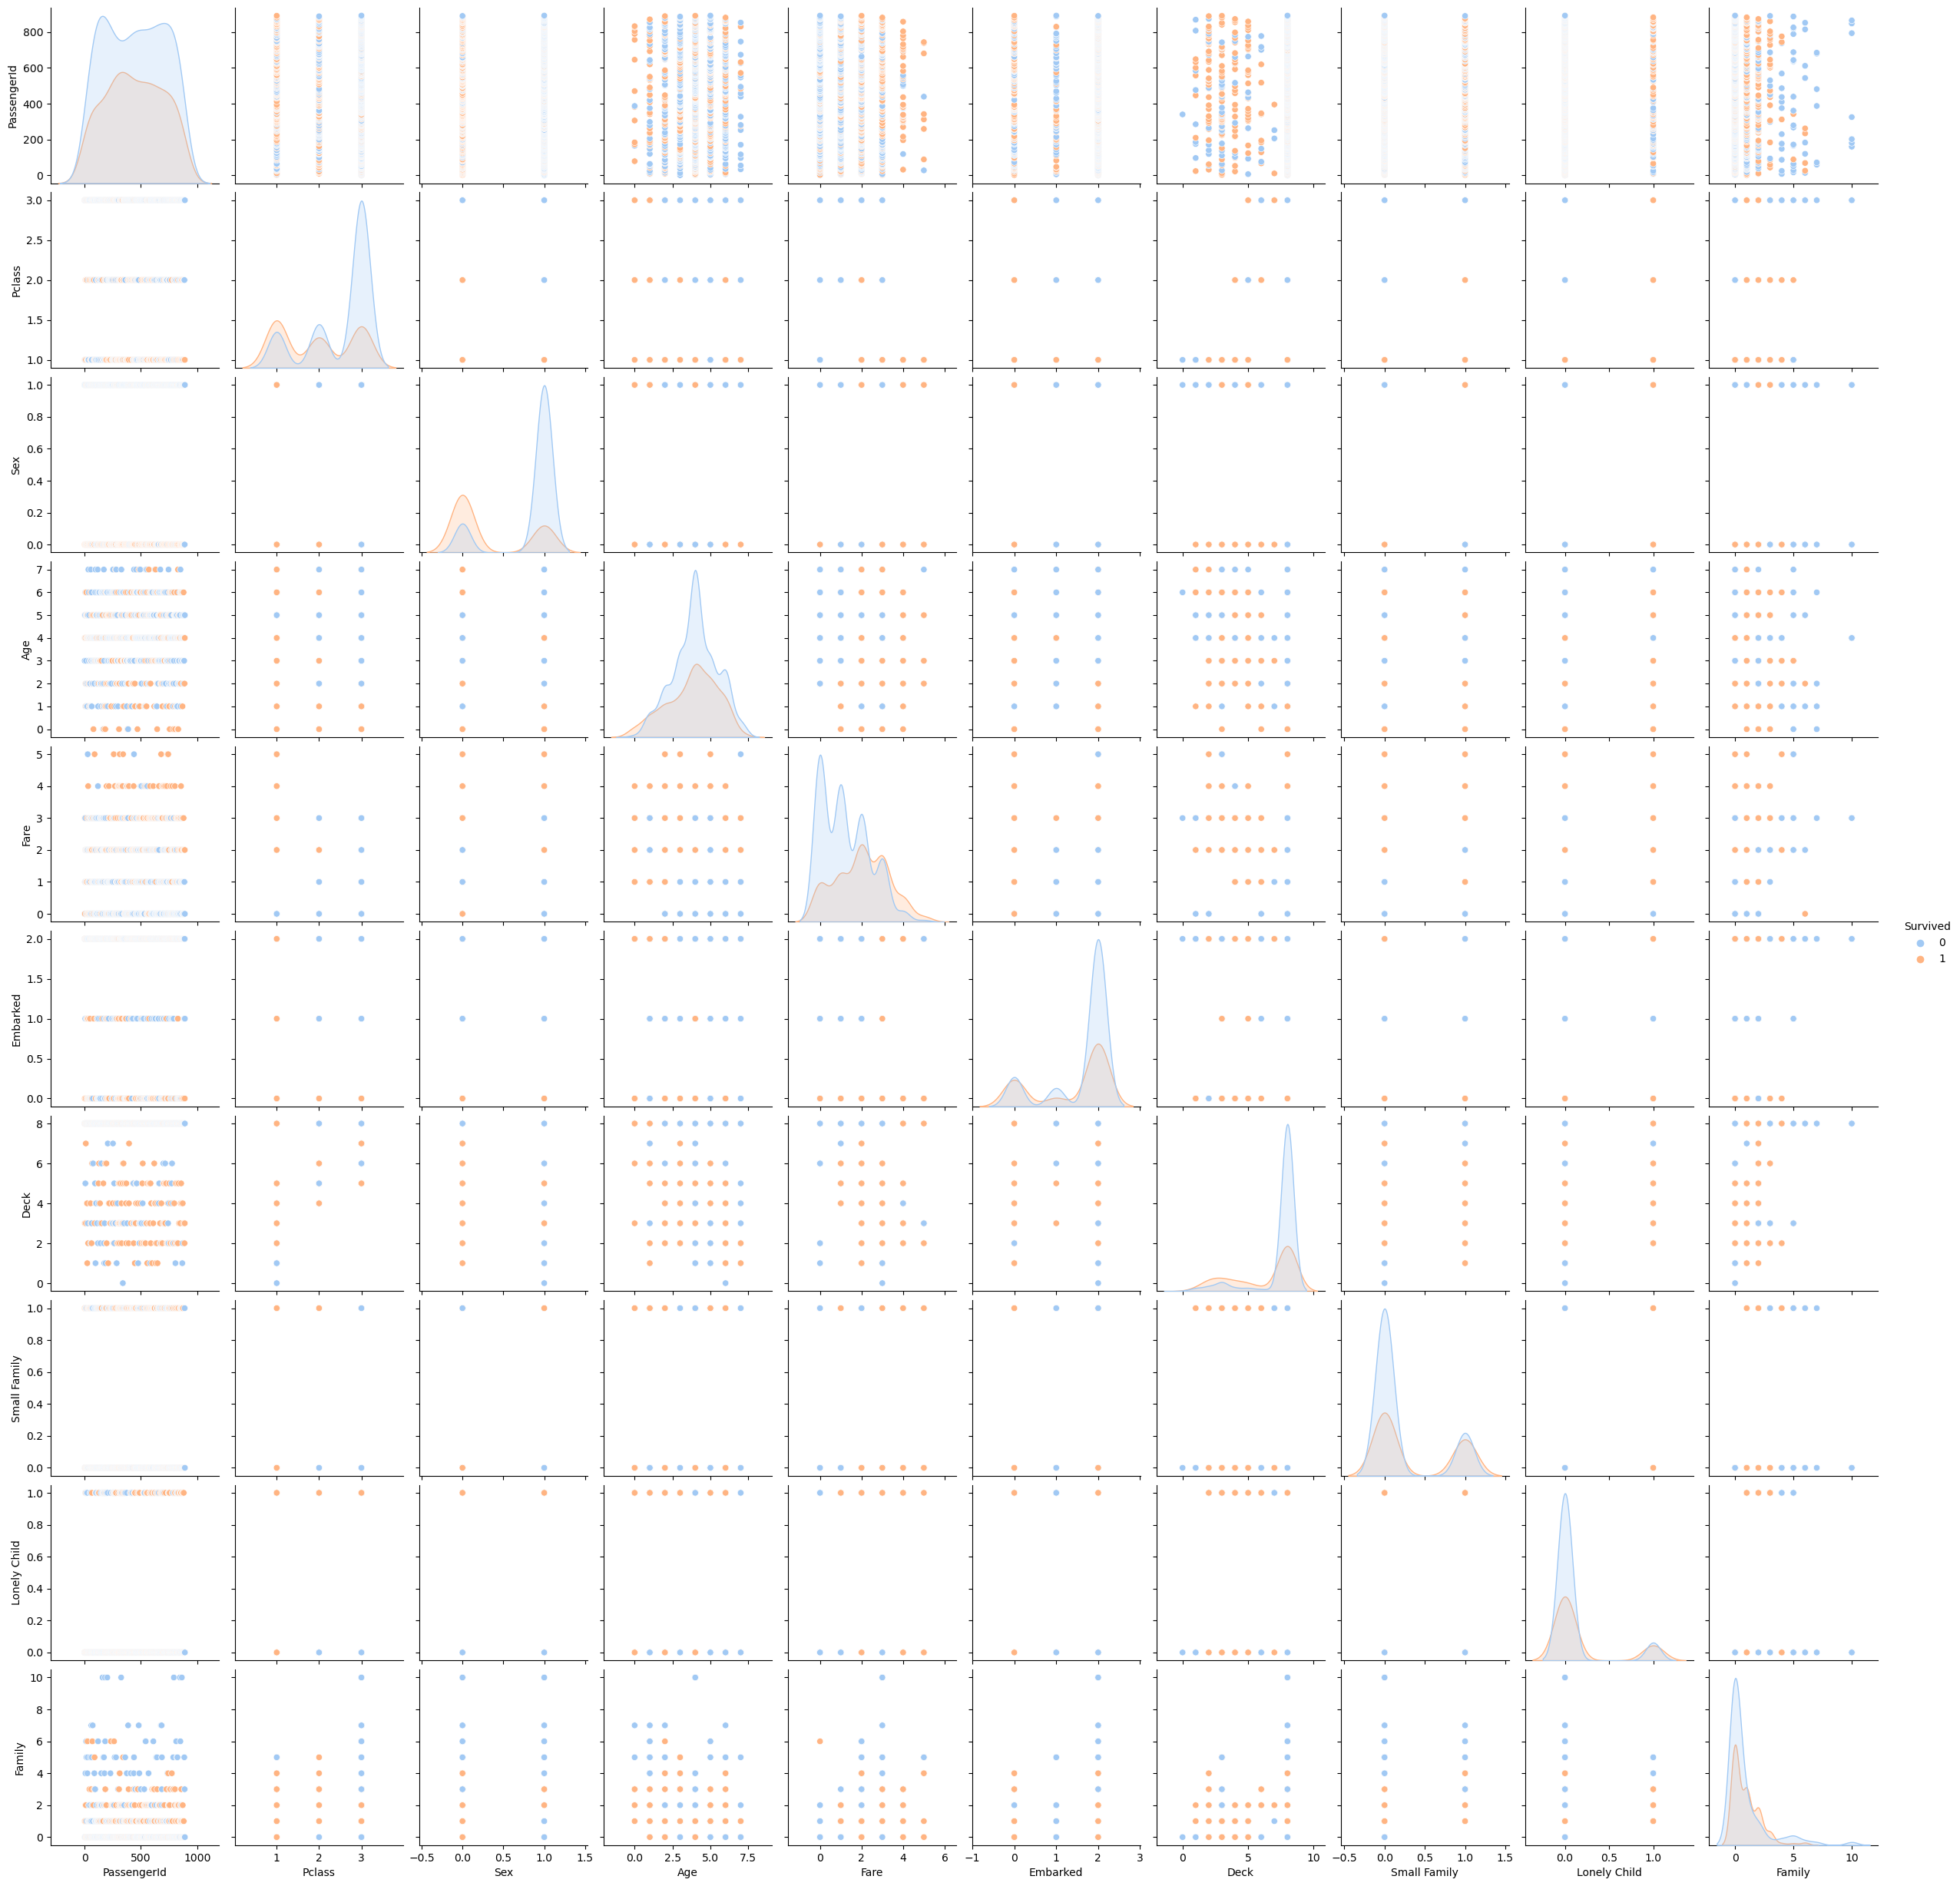

In [82]:
sns.pairplot(train_df, hue="Survived")

**Line Plot(with Markers)**

<Axes: xlabel='Age', ylabel='Survived'>

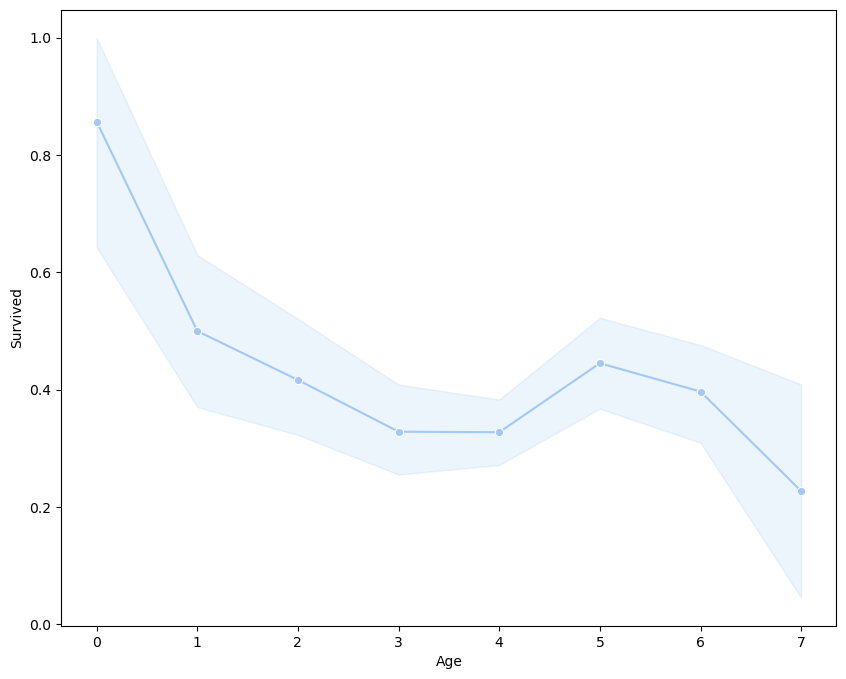

In [83]:
sns.lineplot( x=train_df['Age'], y=train_df['Survived'], marker='o')

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Small Family', 'Lonely Child', 'Family']

<Axes: xlabel='Pclass', ylabel='Survived'>

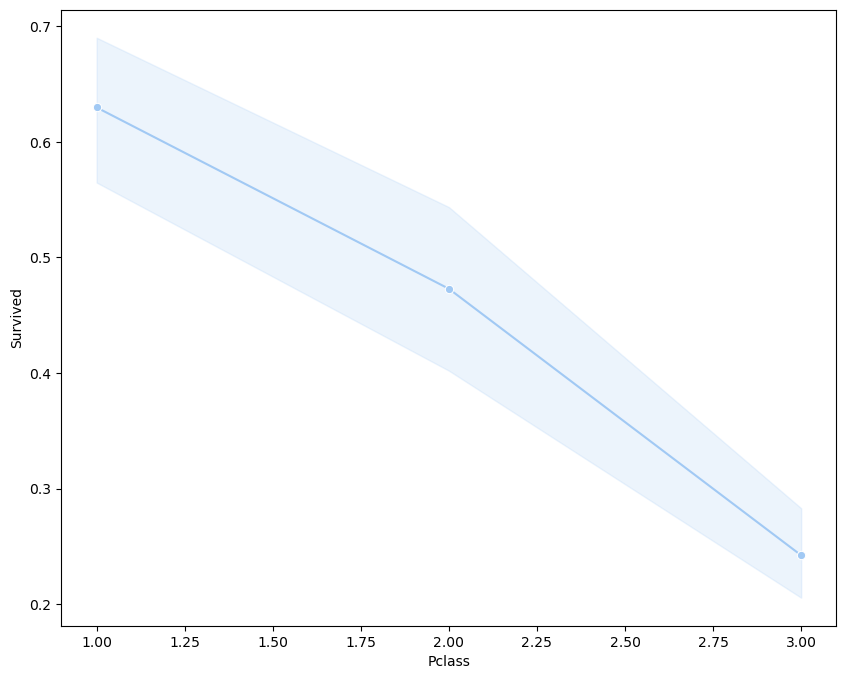

In [84]:
sns.lineplot( x=train_df['Pclass'], y=train_df['Survived'],marker='o')

<Axes: xlabel='Deck', ylabel='Survived'>

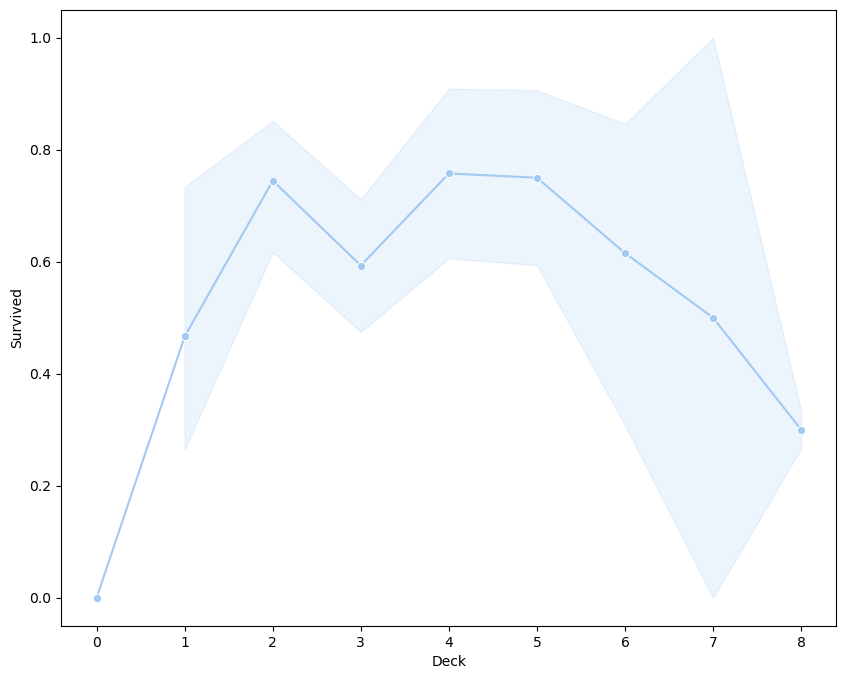

In [85]:
sns.lineplot( x=train_df['Deck'], y=train_df['Survived'], marker='o')

<Axes: xlabel='Small Family', ylabel='Survived'>

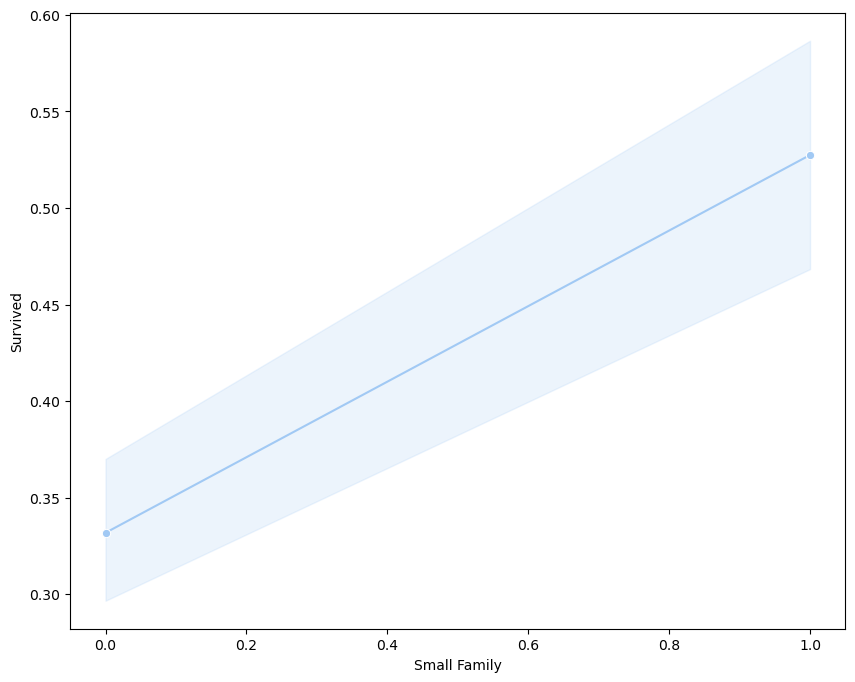

In [86]:
sns.lineplot( x=train_df['Small Family'], y=train_df['Survived'], marker='o')

<Axes: xlabel='Lonely Child', ylabel='Survived'>

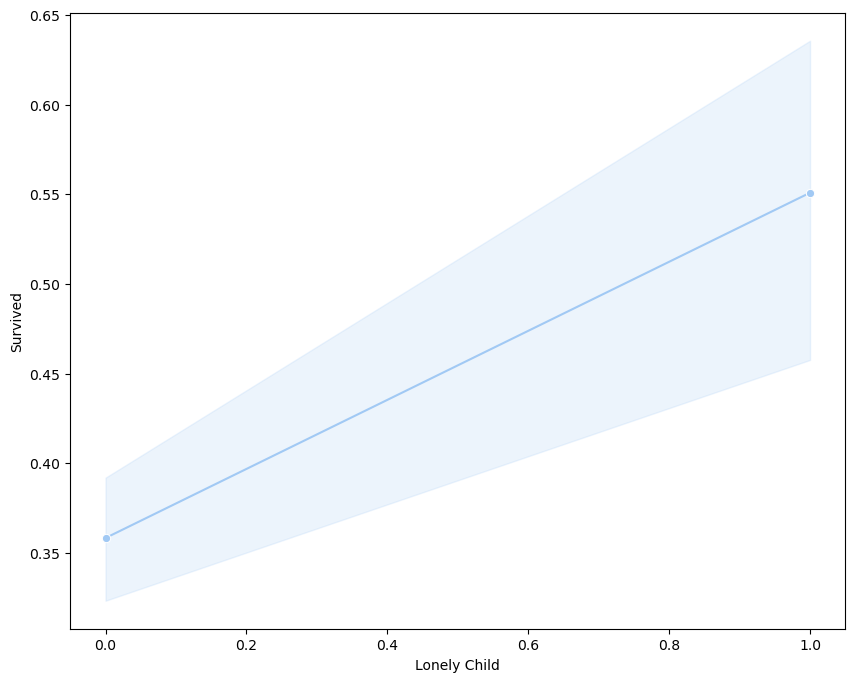

In [87]:
sns.lineplot( x=train_df['Lonely Child'], y=train_df['Survived'], marker='o')

<Axes: xlabel='Family', ylabel='Survived'>

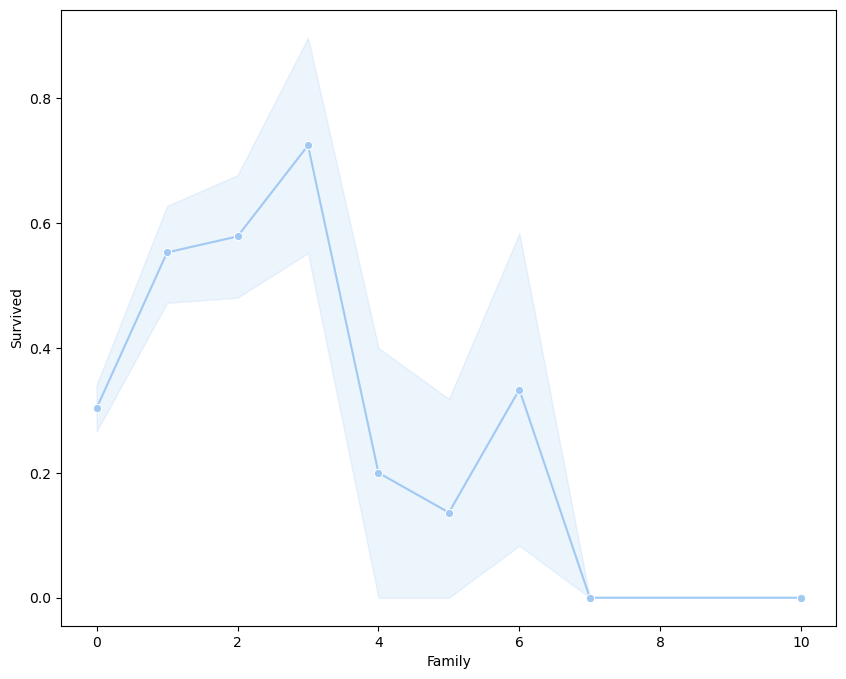

In [88]:
sns.lineplot( x=train_df['Family'], y=train_df['Survived'], marker='o')

**Strip plot**

The strip plot is similar to a scatter plot, often used along with other kinds of plots for better analysis. It is used to visualize the distribution of data points of the variable.

<Axes: xlabel='Age', ylabel='Survived'>

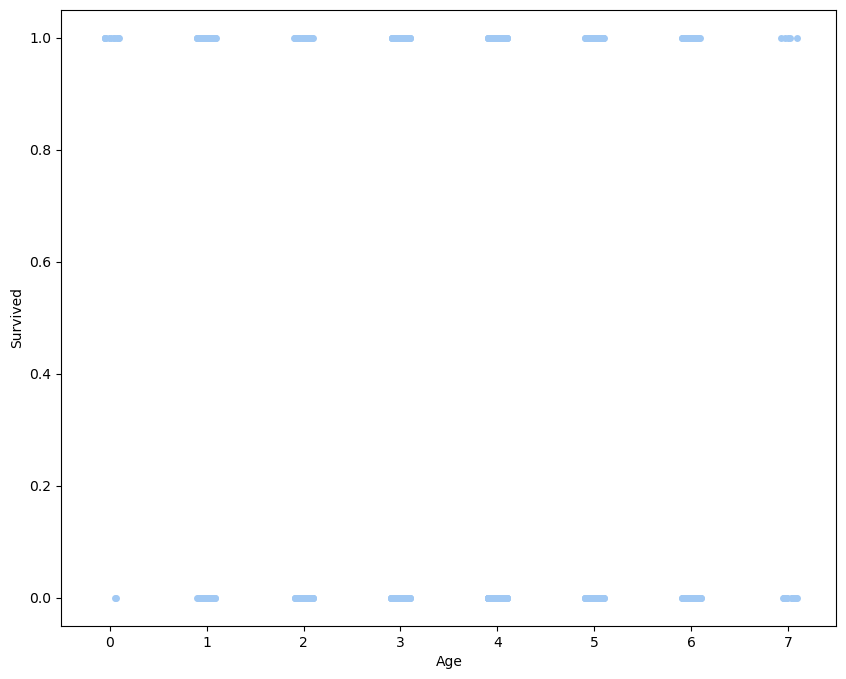

In [89]:
sns.stripplot( x=train_df['Age'], y=train_df['Survived'])

<Axes: xlabel='Deck', ylabel='Survived'>

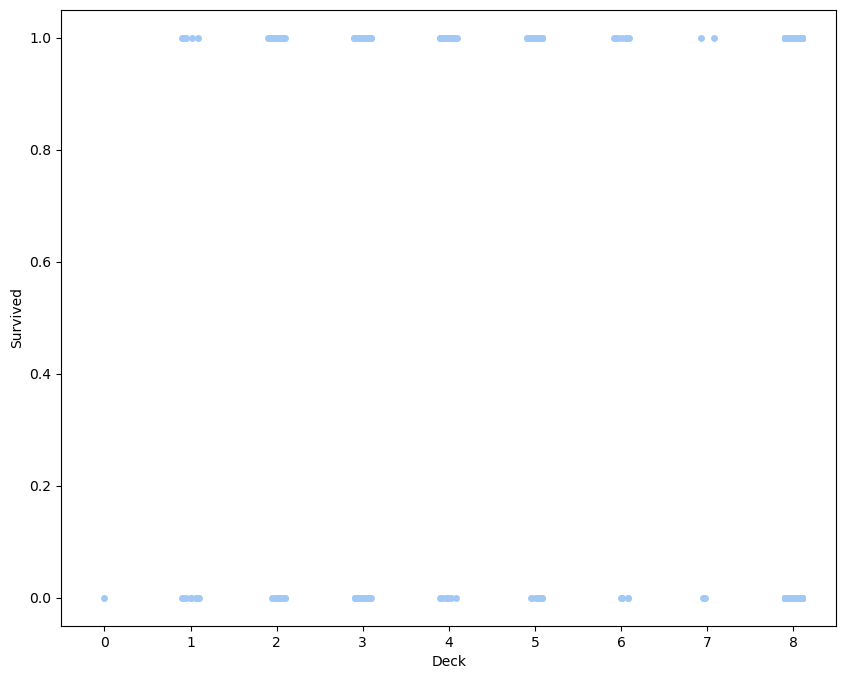

In [90]:
sns.stripplot( x=train_df['Deck'], y=train_df['Survived'])

**Swarm Plot**

The swarm-plot, similar to a strip-plot, provides a visualization technique for univariate data to view the spread of values in a continuous variable. The only difference between the strip-plot and the swarm-plot is that the swarm-plot spreads out the data points of the variable automatically to avoid overlap and hence provides a better visual overview of the data.

C:\Users\rajug\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 61.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rajug\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 69.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rajug\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 48.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rajug\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 46.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
C:\Users\rajug\anaconda3\lib\site-packages\seaborn\categorical.py:3544: UserWarning: 97.4% of the points

<Axes: xlabel='Deck', ylabel='Survived'>

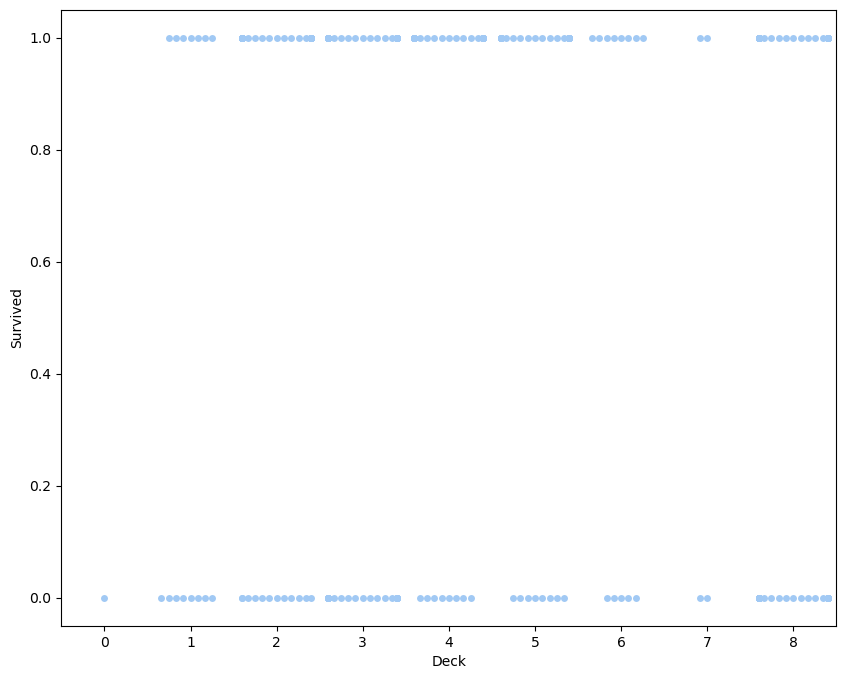

In [91]:
sns.swarmplot( x=train_df['Deck'], y=train_df['Survived'])

**2.Summary plots :** Provides moere concise informations/description of the location, dispersion, and distribution of a variable than an enumerative plot. It is the most efficient way to show an overall conclusion of the overall dataset. 
Types of Summary Plots:
- Histograms
- Density Plots
- BOX plot
- count plot
-barplot

**Histogram**

- similar to bar charts, displays the counts or relative frequencies of values that is in different class intervals or ranges
- displays the shape and spread of continuous sample data and  helps us understand the skewness and kurtosis of the distribution of the data.

<Axes: xlabel='Age', ylabel='Count'>

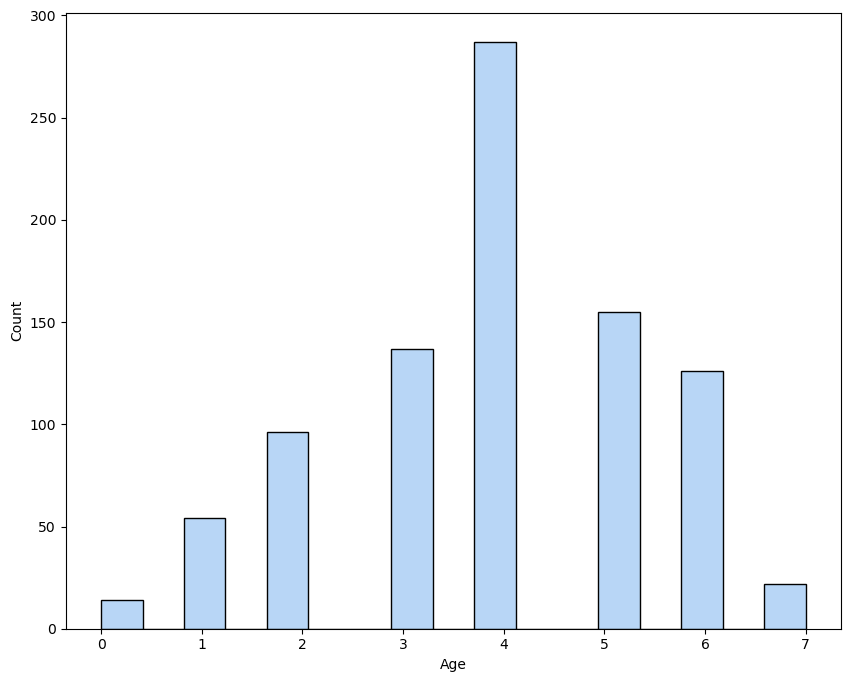

In [92]:
sns.histplot(data=train_df, x="Age") 

<Axes: xlabel='Pclass', ylabel='Count'>

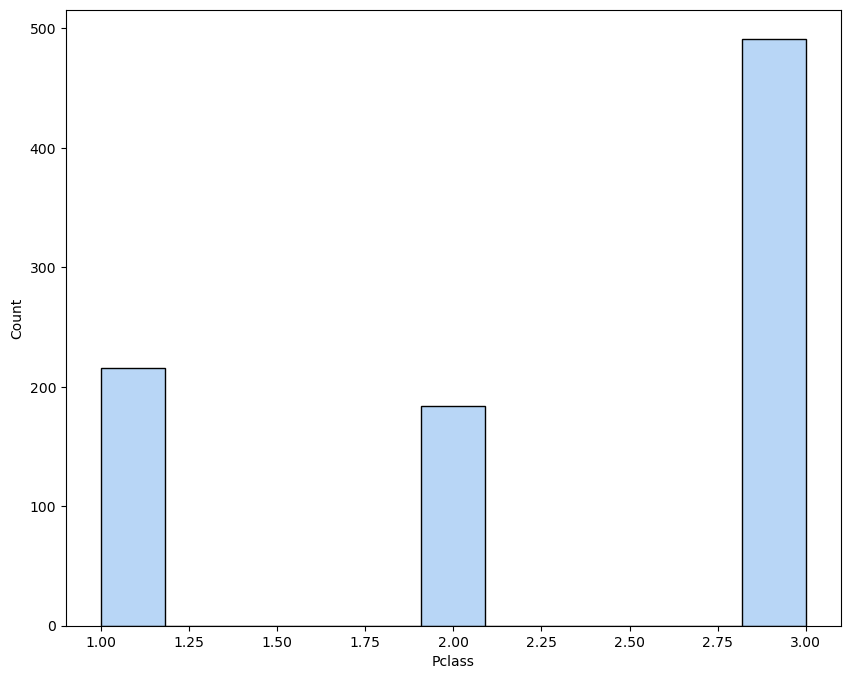

In [93]:
sns.histplot(data=train_df, x="Pclass") 

<Axes: xlabel='Survived', ylabel='Count'>

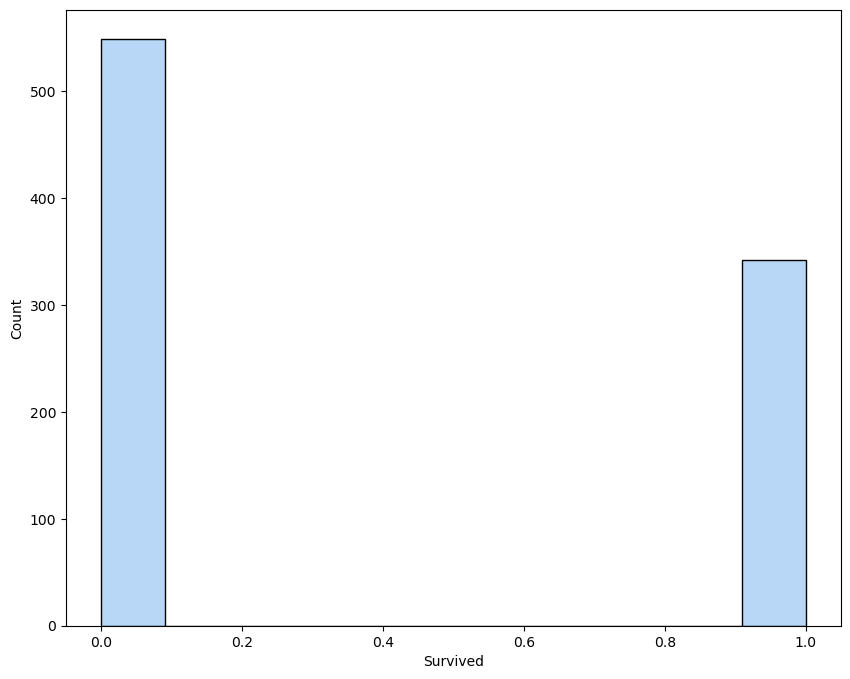

In [94]:
sns.histplot(data=train_df, x="Survived") 

<Axes: xlabel='Embarked', ylabel='Count'>

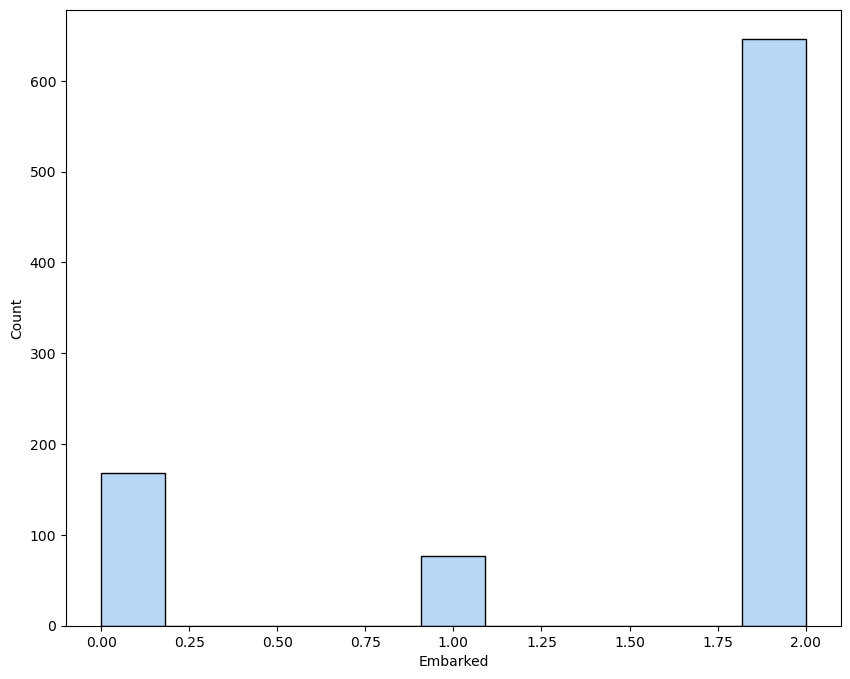

In [95]:
sns.histplot(data=train_df, x="Embarked") 

<Axes: xlabel='Small Family', ylabel='Count'>

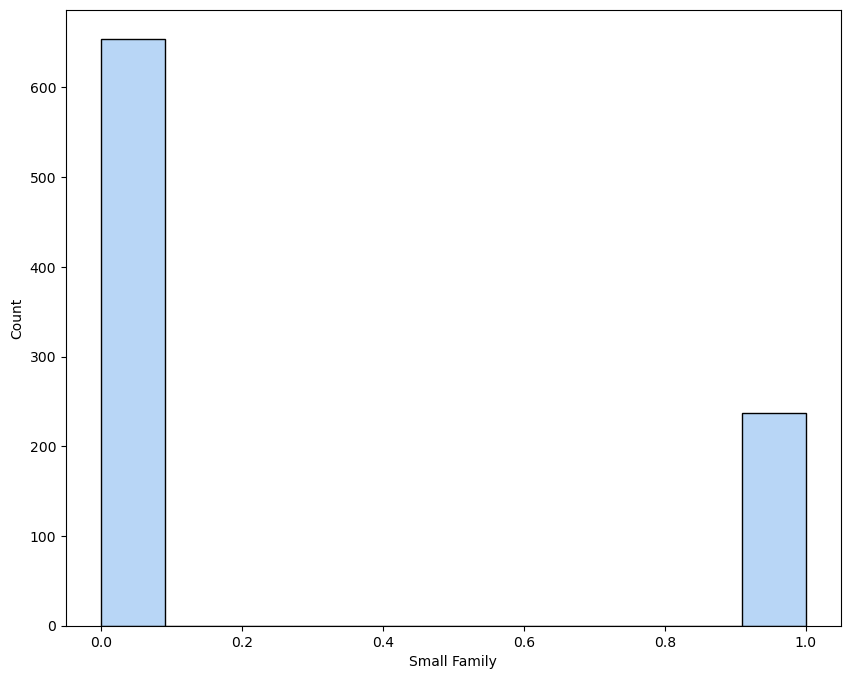

In [96]:
sns.histplot(data=train_df, x="Small Family") 

<Axes: xlabel='Lonely Child', ylabel='Count'>

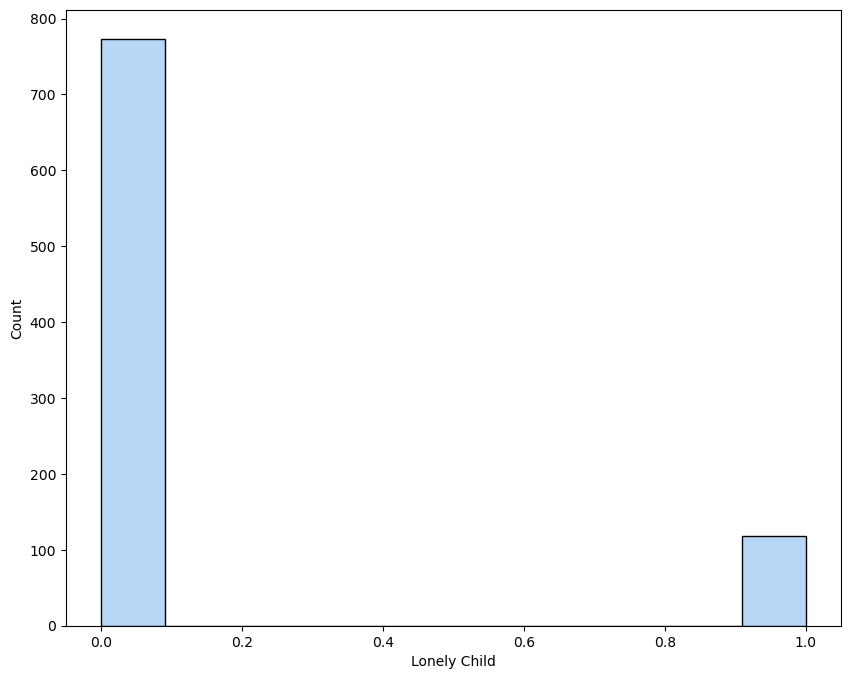

In [97]:
sns.histplot(data=train_df, x="Lonely Child") 

<Axes: xlabel='Family', ylabel='Count'>

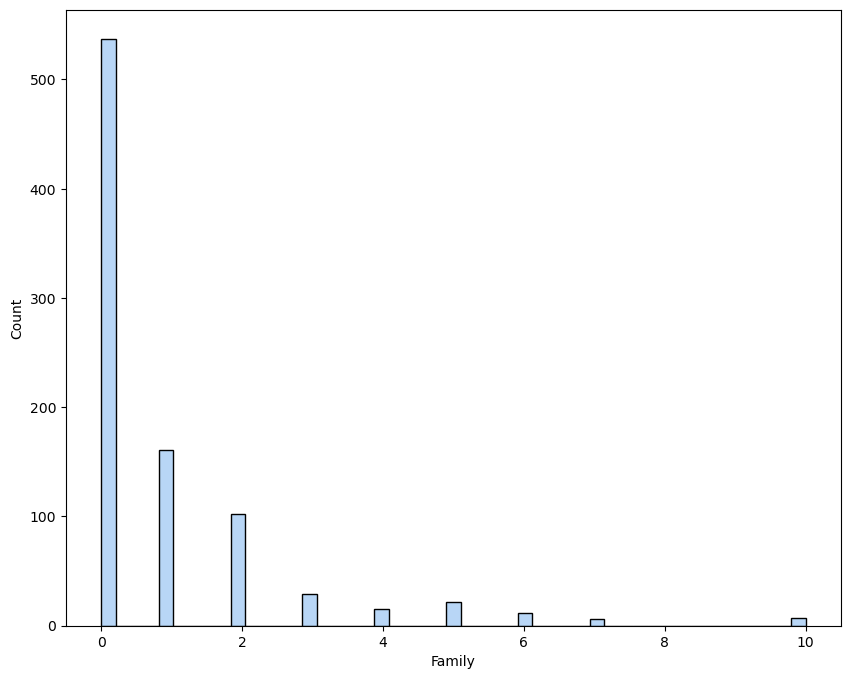

In [98]:
sns.histplot(data=train_df, x="Family") 

**Density Plots**

- a smoother version of a histogram

<Axes: xlabel='Sex', ylabel='Density'>

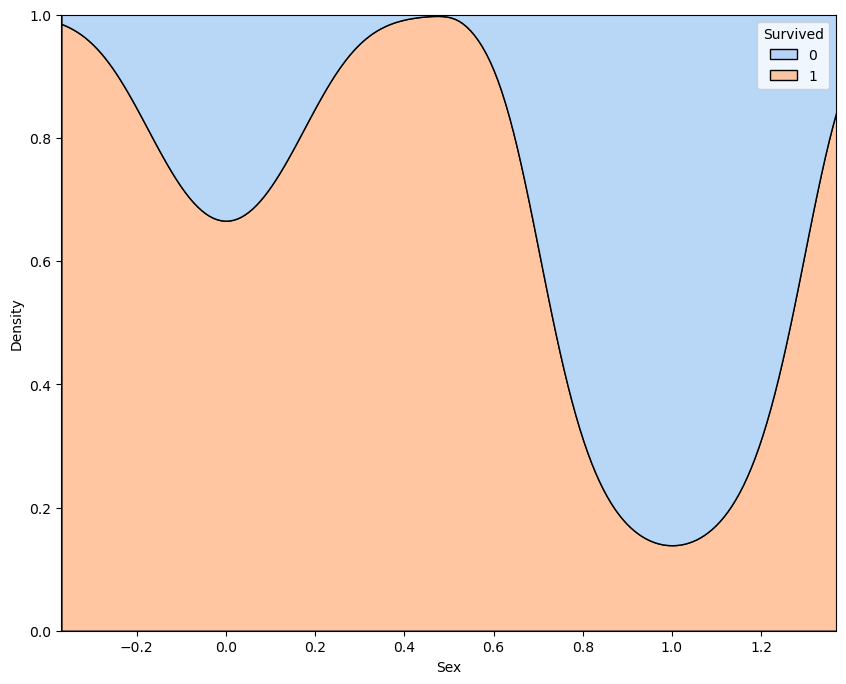

In [100]:
import seaborn as sns
sns.kdeplot(data=train_df, x='Sex', hue='Survived', multiple='fill')



<Axes: xlabel='Family', ylabel='Density'>

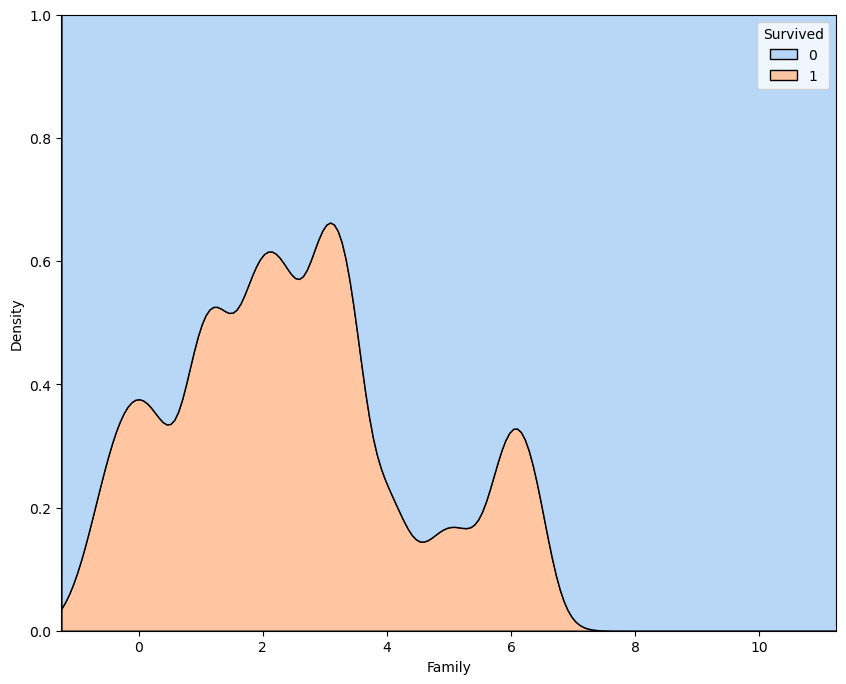

In [102]:
sns.kdeplot(data=train_df, x='Family', hue='Survived', multiple='fill')


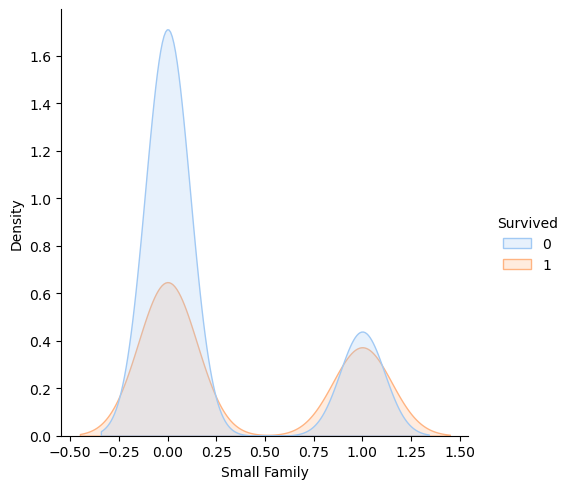

In [104]:

sns.displot(data=train_df, x='Small Family', hue='Survived', kind='kde', fill=True)


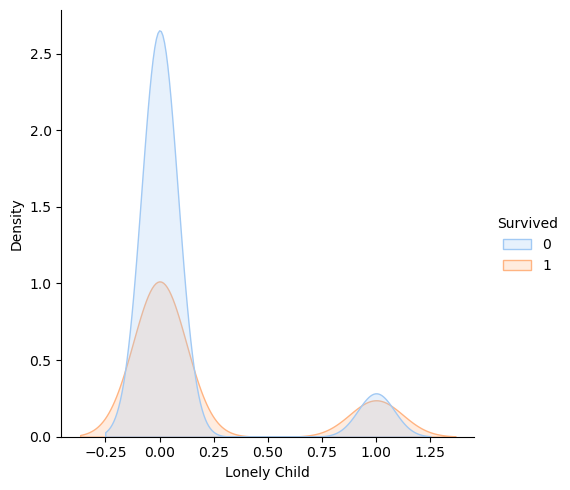

In [106]:

sns.displot(data=train_df, x='Lonely Child', hue='Survived', kind='kde', fill=True)


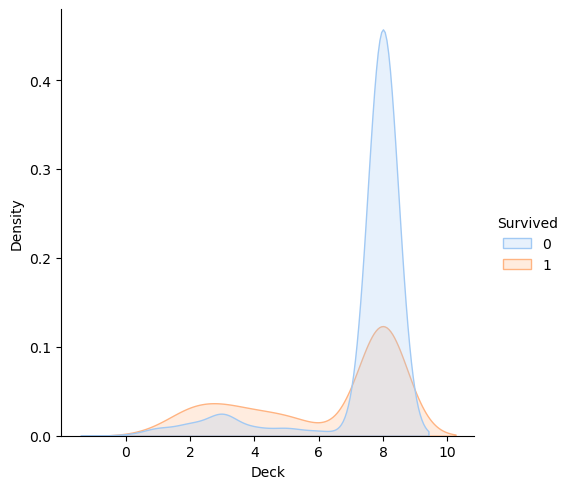

In [107]:

sns.displot(data=train_df, x='Deck', hue='Survived', kind='kde', fill=True)


###Handling Outliers with Box Plots

Text(0.5, 1.0, 'Distribution of the features')

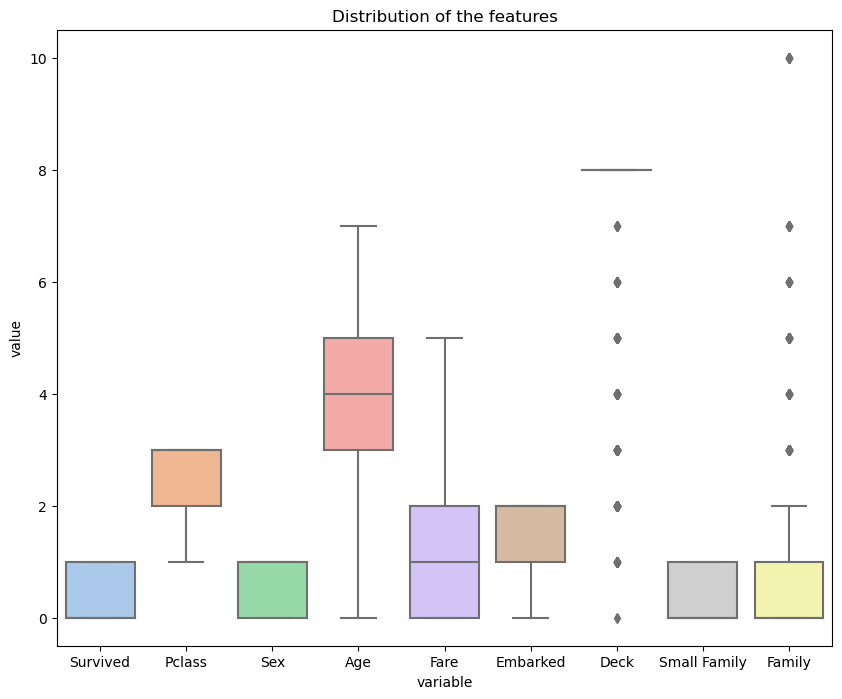

In [108]:
sns.boxplot(x = 'variable', y = 'value', data=pd.melt(train_df[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Small Family', 'Family']]))
plt.title('Distribution of the features')  #boxplot for all the features in a frame

###Count Plot

<Axes: xlabel='Sex', ylabel='count'>

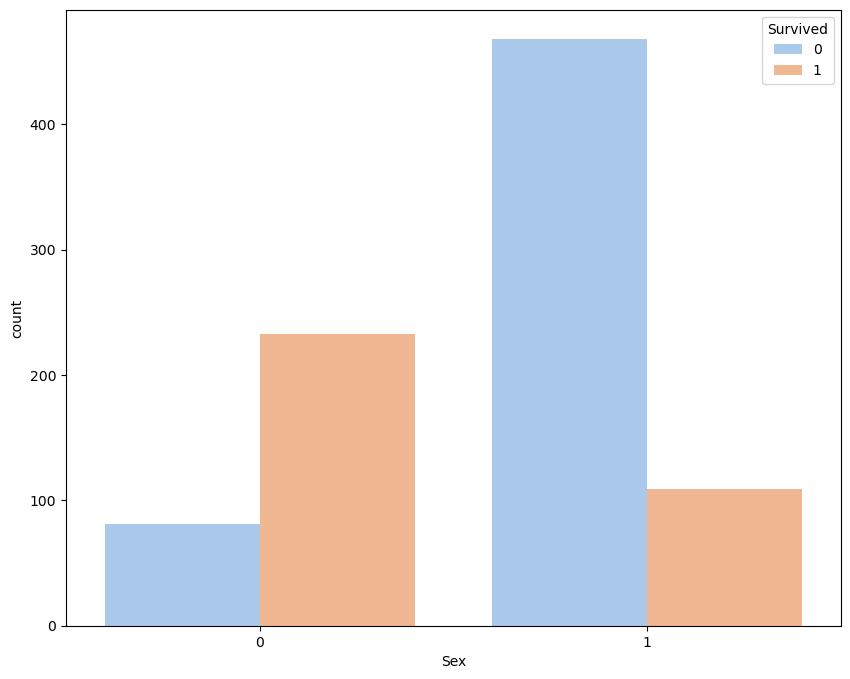

In [109]:
sns.countplot(x='Sex', hue='Survived', data=train_df)

<Axes: xlabel='Pclass', ylabel='count'>

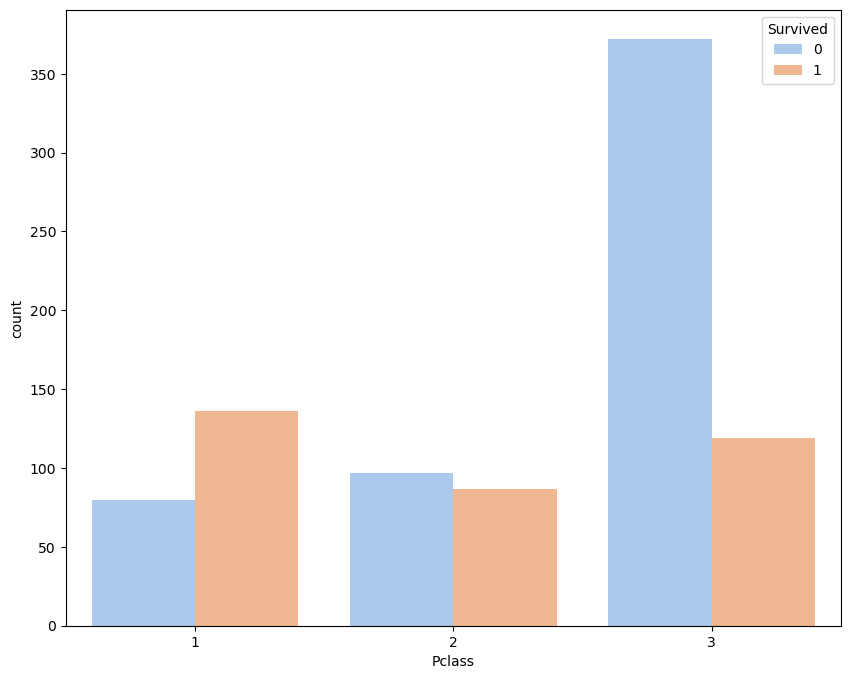

In [110]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

<Axes: xlabel='Lonely Child', ylabel='count'>

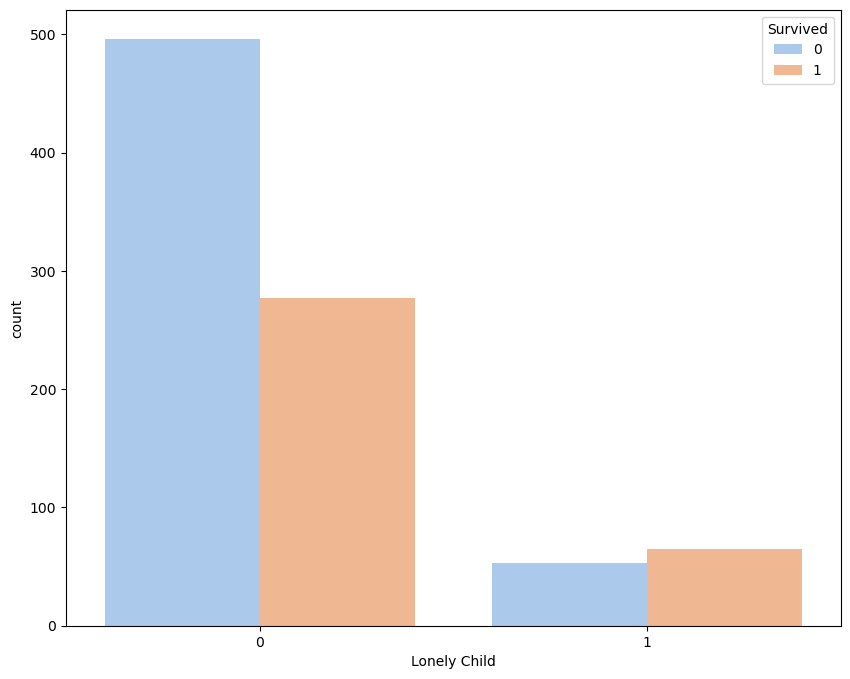

In [111]:
sns.countplot(x='Lonely Child', hue='Survived', data=train_df)

<Axes: xlabel='Small Family', ylabel='count'>

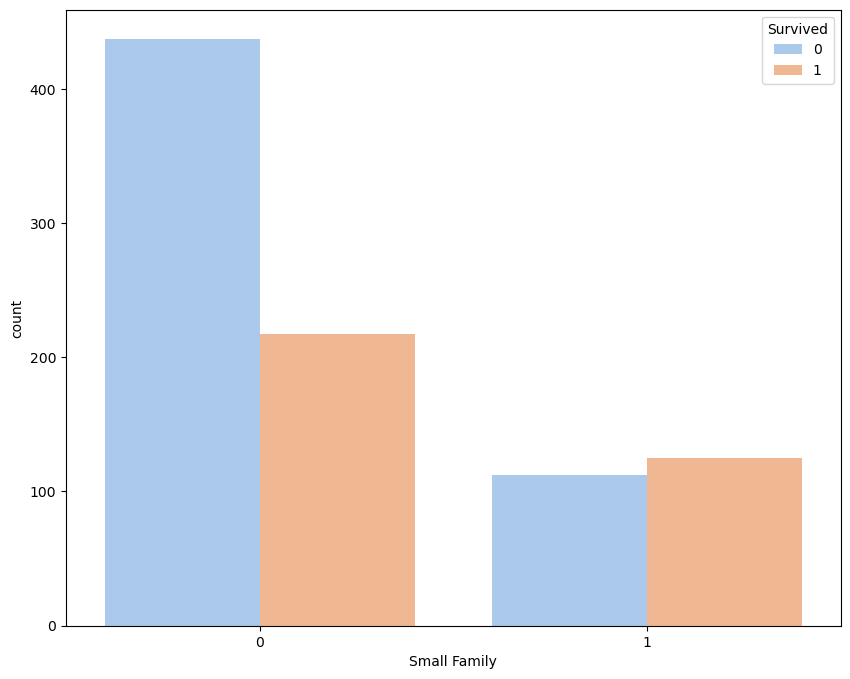

In [112]:
sns.countplot(x='Small Family', hue='Survived', data=train_df)

<Axes: xlabel='Family', ylabel='count'>

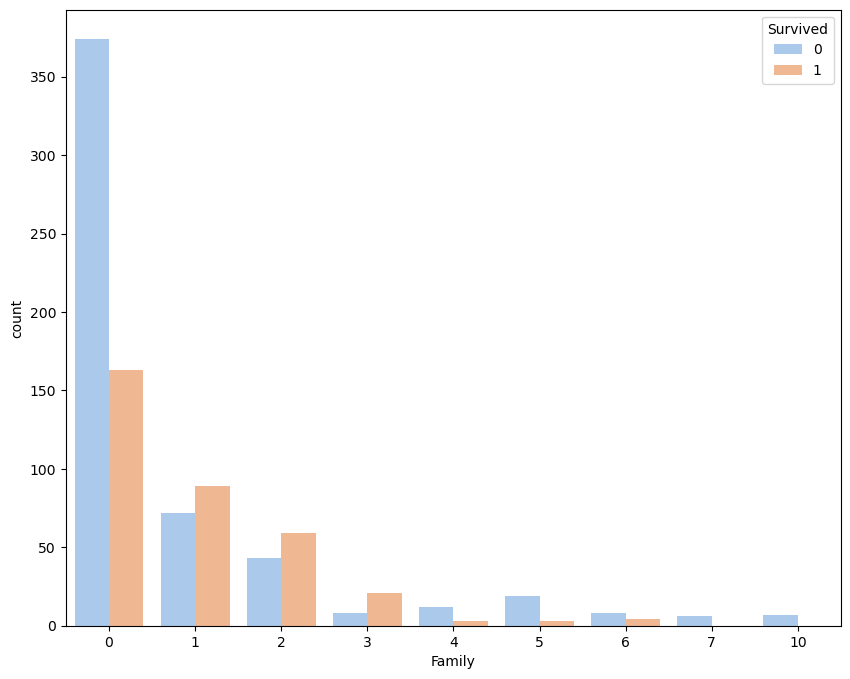

In [113]:
sns.countplot(x='Family', hue='Survived', data=train_df)

<Axes: xlabel='Age', ylabel='count'>

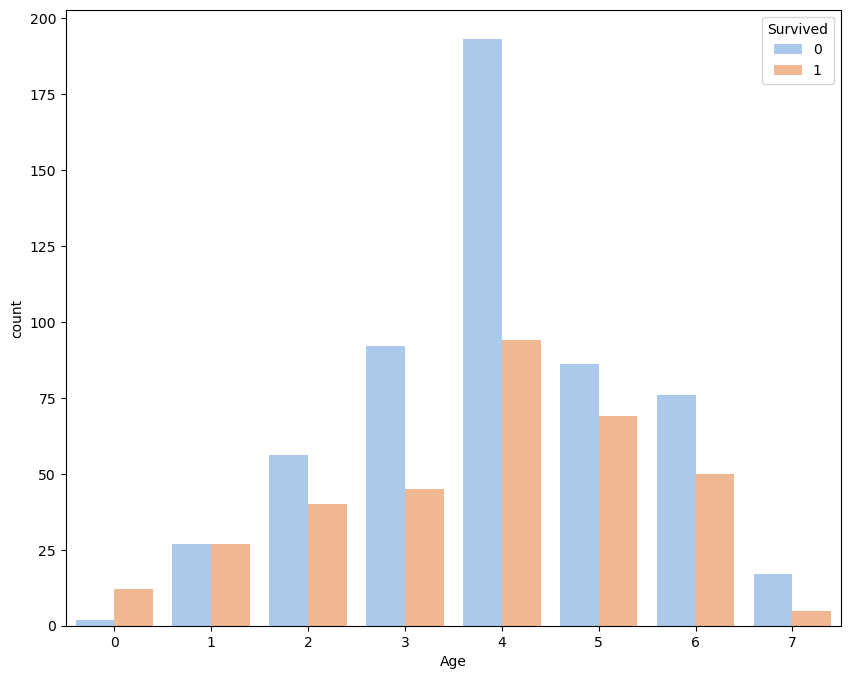

In [114]:
sns.countplot(x='Age', hue='Survived', data=train_df)

<Axes: xlabel='Deck', ylabel='count'>

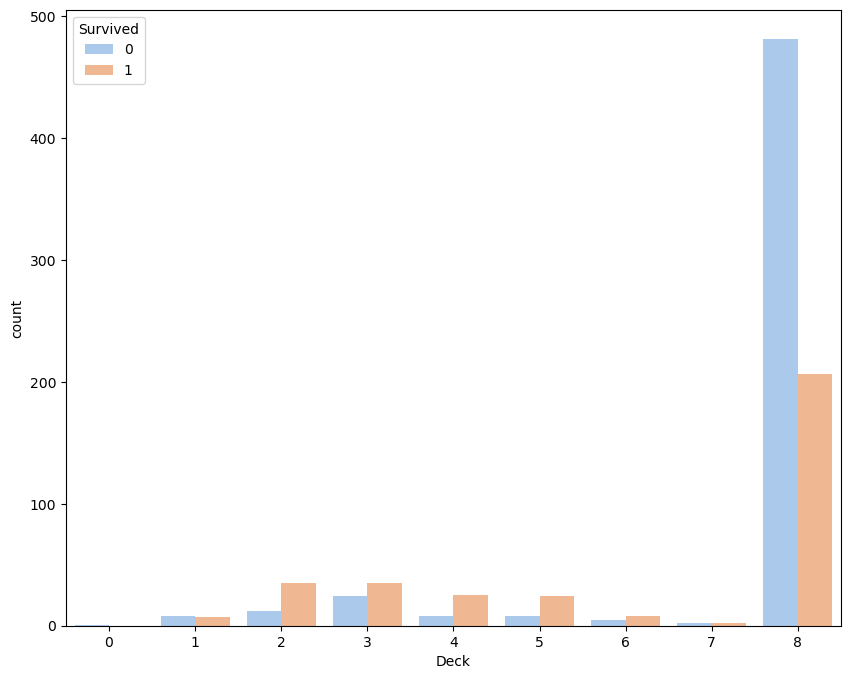

In [115]:
sns.countplot(x='Deck', hue='Survived', data=train_df)

In case of survival, Countplot shows different ratios here. 


<Axes: xlabel='Survived', ylabel='count'>

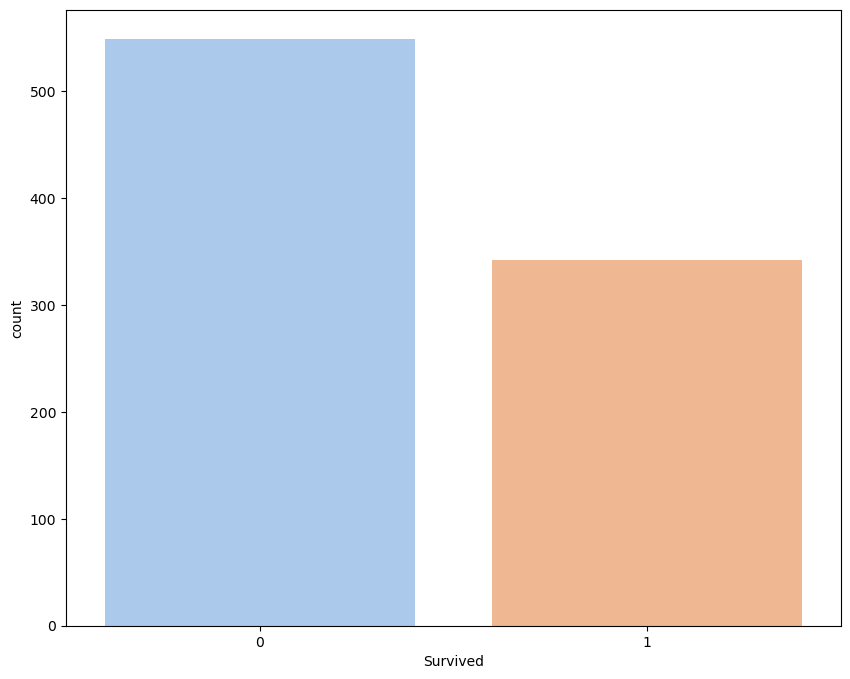

In [116]:
sns.countplot(x='Survived', data=train_df)

#### Bar Plot

<Axes: xlabel='Sex', ylabel='Survived'>

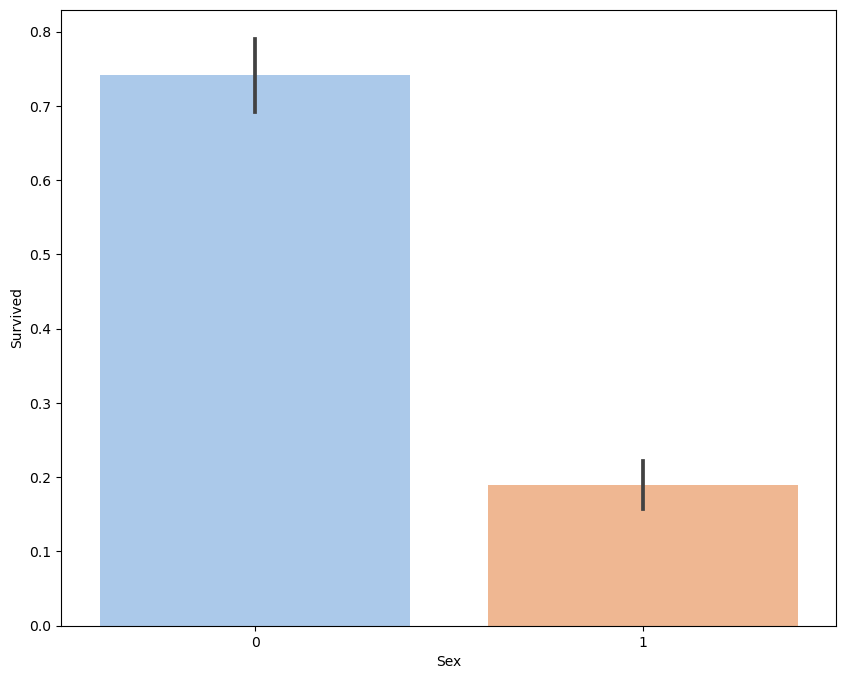

In [117]:
sns.barplot(x = train_df.Sex, y = train_df.Survived)

#### Non-Graphical Univariate Analysis:

In [118]:
train_df.describe().T.head(10)  #T attribute, stands for transpose

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.0,223.5,446.0,668.5,891.0
Survived,891.0,0.383838,0.486592,0.0,0.0,0.0,1.0,1.0
Pclass,891.0,2.308642,0.836071,1.0,2.0,3.0,3.0,3.0
Sex,891.0,0.647587,0.477990,0.0,0.0,1.0,1.0,1.0
Age,891.0,3.916947,1.529432,0.0,3.0,4.0,5.0,7.0
Fare,891.0,1.523008,1.250743,0.0,0.0,1.0,2.0,5.0
Embarked,891.0,1.536476,0.791503,0.0,1.0,2.0,2.0,2.0
Deck,891.0,6.936027,2.074282,0.0,8.0,8.0,8.0,8.0
Small Family,891.0,0.265993,0.442109,0.0,0.0,0.0,1.0,1.0
Lonely Child,891.0,0.132435,0.339154,0.0,0.0,0.0,0.0,1.0


In [119]:
test_df.describe().T.head(10)

,count,mean,std,min,25%,50%,75%,max
PassengerId,418.0,1100.500000,120.810458,892.0,996.25,1100.5,1204.75,1309.0
Pclass,418.0,2.265550,0.841838,1.0,1.00,3.0,3.00,3.0
Sex,418.0,0.636364,0.481622,0.0,0.00,1.0,1.00,1.0
Age,418.0,3.961722,1.473497,0.0,3.00,4.0,5.00,7.0
Fare,418.0,1.528708,1.310496,0.0,0.00,1.0,2.00,5.0
Embarked,418.0,1.401914,0.854496,0.0,1.00,2.0,2.00,2.0
Deck,418.0,6.976077,2.048431,1.0,8.00,8.0,8.00,8.0
Small Family,418.0,0.296651,0.457329,0.0,0.00,0.0,1.00,1.0
Lonely Child,418.0,0.124402,0.330435,0.0,0.00,0.0,0.00,1.0
Family,418.0,0.839713,1.519072,0.0,0.00,0.0,1.00,10.0


## ___(c)Bivariate analysis:
- through multicolinearity check that has been done before
- visualization through Scatter plots 
- Correlation Plot

**Scatter Plot**

In a scatter plot it uses dots to represent values for **two different numeric variables**. The position of each dot on the horizontal and vertical axis indicates values for an individual data point. Scatter plots are used to observe relationships between variables.
- Two columns need to be selected from a data table for Scatter plot, one for each dimension of the plot. Each row of the table will become a single dot in the plot with position according to the column values.
##### when to use scatter plot?
- To observe and show relationships between two numeric variables
- Identification of correlational relationships between the dependent variables(y-axis) and independent variables(X-axis) 
-  Relationships between variables can be described in many ways: positive or negative, strong or weak, linear or nonlinear.   

<Axes: xlabel='Family', ylabel='Survived'>

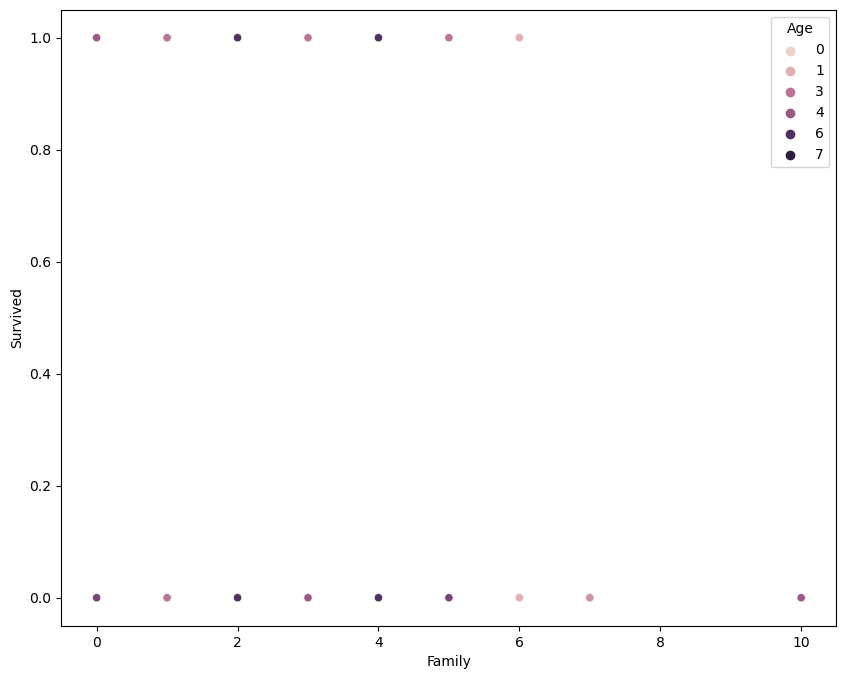

In [120]:
sns.scatterplot(data=train_df, x=train_df['Family'], y=train_df['Survived'],hue = "Age")

<Axes: xlabel='Small Family', ylabel='Survived'>

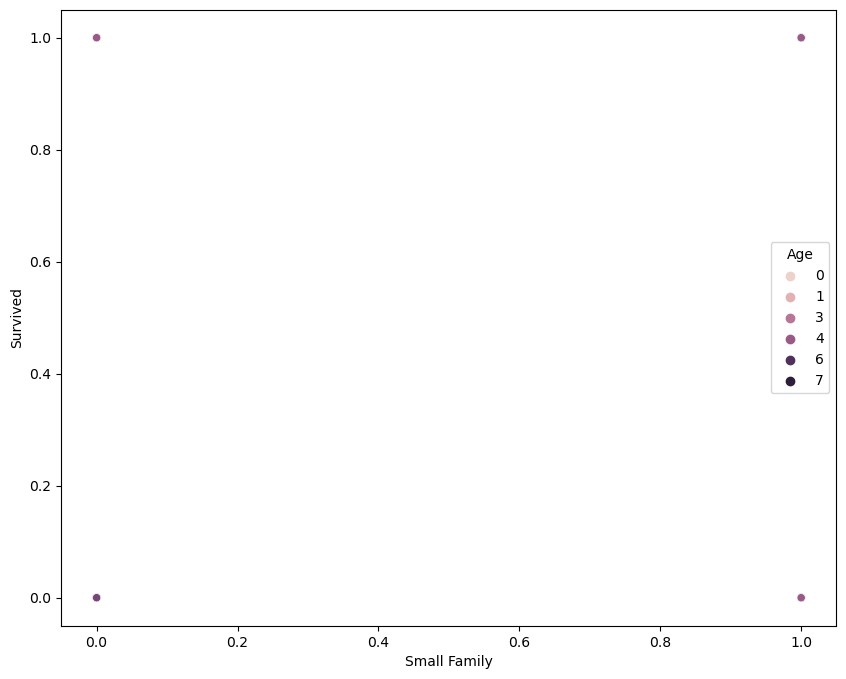

In [121]:
sns.scatterplot(data=train_df, x=train_df['Small Family'], y=train_df['Survived'],hue = "Age")

<Axes: xlabel='Embarked', ylabel='Survived'>

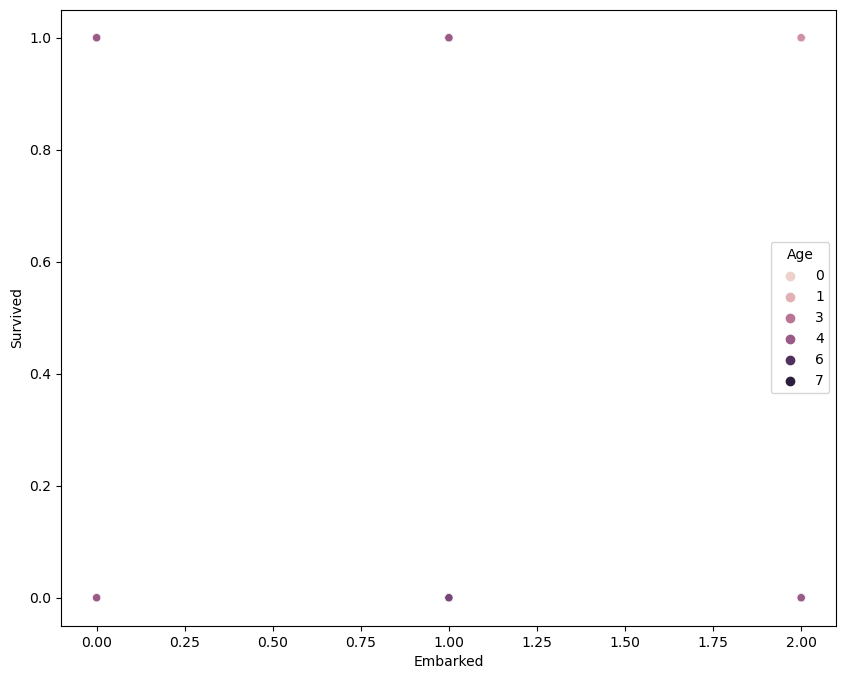

In [122]:
sns.scatterplot(data=train_df, x=train_df['Embarked'], y=train_df['Survived'],hue = "Age")

### Correlation Map

Text(0.5, 1.0, 'Correlation between Features in Train')

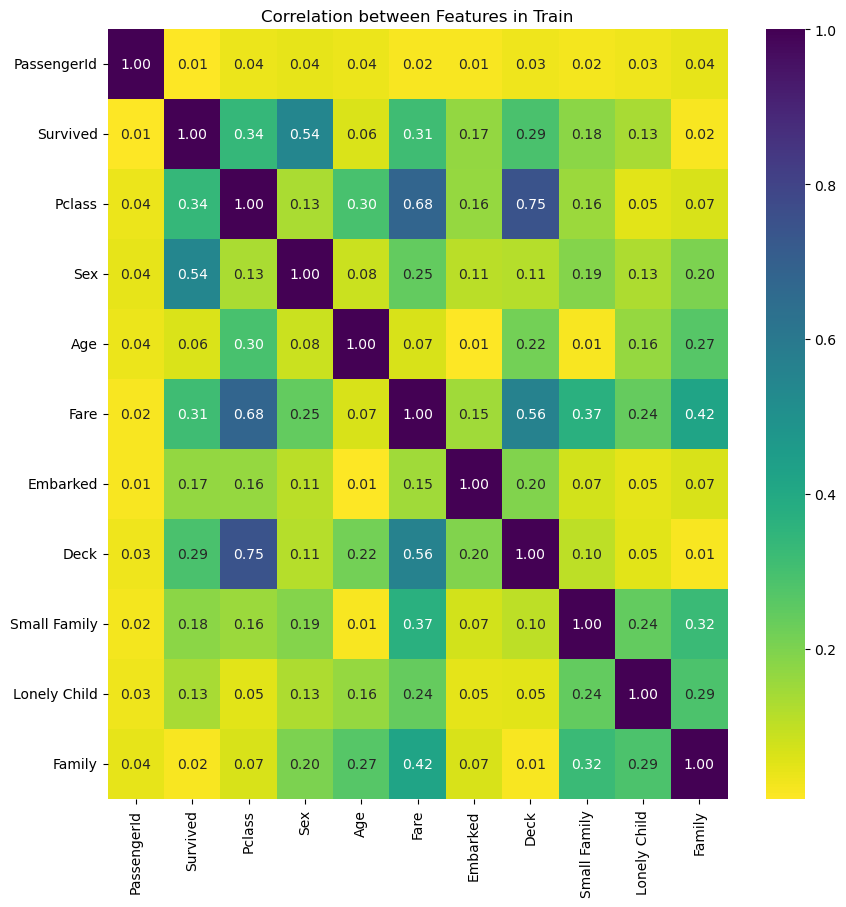

In [123]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(train_df.corr()),annot=True,cmap='viridis_r',fmt="0.2f")
plt.title('Correlation between Features in Train')

Text(0.5, 1.0, 'Correlation between Features in Train')

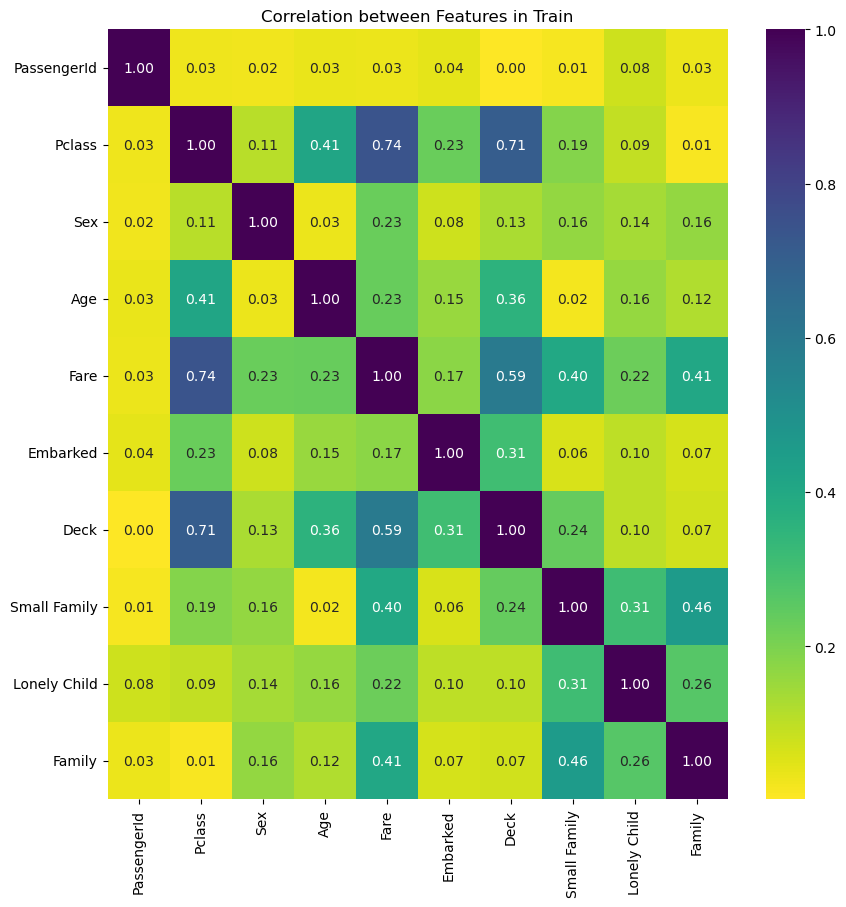

In [124]:
plt.figure(figsize=(10,10))
sns.heatmap(np.abs(test_df.corr()),annot=True,cmap='viridis_r',fmt="0.2f")
plt.title('Correlation between Features in Train')

# Feature Engineering

In [125]:
print(train_df.columns.tolist())
print(test_df.columns.tolist())

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Small Family', 'Lonely Child', 'Family']
['PassengerId', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Small Family', 'Lonely Child', 'Family']


In [126]:
x_train = train_df[['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Small Family', 'Lonely Child', 'Family']]  #Selecting independent features
x_test  = test_df [['Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Deck', 'Small Family', 'Lonely Child', 'Family' ]]
y = train_df['Survived'] #Selecting target

# Data Splitting

In [127]:
from sklearn.model_selection import train_test_split     #data splitting
X_train, X_test, y_train, y_test = train_test_split(x_train,y, test_size=0.2, random_state=20)


#Model Training and Evaluation

In [128]:
#LogisticRegression

from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(random_state=21).fit(X_train, y_train)
lr.score(X_test, y_test)


print("Train Set Accuracy:"+str(accuracy_score(y_train,lr.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,lr.predict(X_test))*100))

Train Set Accuracy:79.91573033707866
Test Set Accuracy:83.24022346368714


In [129]:
#RandomForestClassifier

from sklearn.ensemble import RandomForestClassifier
RF=RandomForestClassifier(n_estimators=150, max_depth=25, random_state=25)
RF.fit(X_train,y_train)

print("Train Set Accuracy:"+str(accuracy_score(y_train,RF.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,RF.predict(X_test))*100))

Train Set Accuracy:92.69662921348315
Test Set Accuracy:80.44692737430168


In [130]:
#KNeighborsClassifier


from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 3) 
knn.fit(X_train, y_train) 

print("Train Set Accuracy:"+str(accuracy_score(y_train,knn.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,knn.predict(X_test))*100))

Train Set Accuracy:86.93820224719101
Test Set Accuracy:78.77094972067039


In [131]:
#DecisionTreeClassifier


from sklearn.tree import DecisionTreeClassifier
DTC= DecisionTreeClassifier(criterion='entropy',max_depth=25)
DTC.fit(X_train,y_train)

print("Train Set Accuracy:"+str(accuracy_score(y_train,DTC.predict(X_train))*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test,DTC.predict(X_test))*100))

Train Set Accuracy:92.69662921348315
Test Set Accuracy:76.53631284916202


In [132]:
ran = RandomForestClassifier(max_depth=10,random_state=1)
ran.fit(X_train,y_train)
test_data = test_df.drop("PassengerId", axis=1).copy()
prediction = ran.predict(test_data)
submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": prediction
    })

In [133]:
submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [134]:
submission.to_csv('submission.csv', index=False)

In [135]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
